# Prepare Environment and Load Data

In [3]:
%pip install seaborn
%pip install matplotlib
%pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from scipy.stats import norm
from scipy.stats import f_oneway

In [5]:
data = pd.read_csv("/Users/jessi/OneDrive/Data_Science/CodeOp/IndividualProject/stex.csv", delimiter=',', encoding='latin1')


## Preliminary Data Familiarization

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50235 entries, 0 to 50234
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   L1          50235 non-null  object 
 1   C           50235 non-null  object 
 2   L1L2        50235 non-null  object 
 3   L2          50235 non-null  object 
 4   AaA         50235 non-null  int64  
 5   LoR         50235 non-null  int64  
 6   Edu.day     50226 non-null  float64
 7   Sex         50235 non-null  object 
 8   Family      50235 non-null  object 
 9   ISO639.3    50235 non-null  object 
 10  Enroll      50235 non-null  int64  
 11  Speaking    50235 non-null  int64  
 12  morph       48426 non-null  float64
 13  lex         50235 non-null  float64
 14  new_feat    48219 non-null  float64
 15  new_sounds  48219 non-null  float64
dtypes: float64(5), int64(4), object(7)
memory usage: 6.1+ MB


### The dataset consists of about 50,000 language learners. The contents of the dataset can be roughly grouped into two sets of information: data related to each language learner, and data related to their native language. 

### In respect to data about the language learner, fields include strings such as the learners' country of birth ("C"); native language ("L1"); native language and second most proficient language other than Dutch ("L1L2"), and sex ("Sex"). Numerical data is found in learner fields such as age of arrival in the Netherlands ("AaA"), length of residency in the Netherlands ("LoR"), amount of formal education ("Edu.day") and speaking exam score ("Speaking"). 

### In respect to data about the native language, fields include strings such as the language's ID code ("ISO639.3") and the language's linguistic family ("Family"). Numerical data is found in language fields where the original researchers quantified the degree of similarity of certain features of the native language with Dutch, such as morphology ("morph") and lexicon ("lex"). 

### An additional field provides numerical data for the proportion of school enrollment in the country of birth ("Enroll"). 

### By looking at the head of the data, we can get an idea of the kind of information contained in each column, and we can begin to see what kind of data processing is needed. For example, there are some NaN values which may be considered for removal.  

In [7]:
data.head()

,L1,C,L1L2,L2,AaA,LoR,Edu.day,Sex,Family,ISO639.3,Enroll,Speaking,morph,lex,new_feat,new_sounds
0,Afrikaans,SouthAfrica,AfrikaansEnglish,English,25,0,4.0,Female,Indo-European,afr,93,496,NaN,0.010463,NaN,NaN
1,Afrikaans,SouthAfrica,AfrikaansGerman,German,47,2,4.0,Male,Indo-European,afr,93,542,NaN,0.010463,NaN,NaN
2,Afrikaans,SouthAfrica,AfrikaansMonolingual,Monolingual,23,23,3.0,Female,Indo-European,afr,93,585,NaN,0.010463,NaN,NaN
3,Afrikaans,SouthAfrica,AfrikaansMonolingual,Monolingual,42,2,2.0,Female,Indo-European,afr,93,521,NaN,0.010463,NaN,NaN
4,Afrikaans,SouthAfrica,AfrikaansMonolingual,Monolingual,22,19,3.0,Female,Indo-European,afr,93,639,NaN,0.010463,NaN,NaN


# Data Cleaning

## Check Type

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50235 entries, 0 to 50234
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   L1          50235 non-null  object 
 1   C           50235 non-null  object 
 2   L1L2        50235 non-null  object 
 3   L2          50235 non-null  object 
 4   AaA         50235 non-null  int64  
 5   LoR         50235 non-null  int64  
 6   Edu.day     50226 non-null  float64
 7   Sex         50235 non-null  object 
 8   Family      50235 non-null  object 
 9   ISO639.3    50235 non-null  object 
 10  Enroll      50235 non-null  int64  
 11  Speaking    50235 non-null  int64  
 12  morph       48426 non-null  float64
 13  lex         50235 non-null  float64
 14  new_feat    48219 non-null  float64
 15  new_sounds  48219 non-null  float64
dtypes: float64(5), int64(4), object(7)
memory usage: 6.1+ MB


### There are no unexpected data types. 

## Check for Duplicates

In [9]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
50230    False
50231    False
50232    False
50233    False
50234    False
Length: 50235, dtype: bool

### There are no duplicated entries in the data set.

## Check for NaN values

In [10]:
## Check for missing values
print(data.isnull().any())

L1            False
C             False
L1L2          False
L2            False
AaA           False
LoR           False
Edu.day        True
Sex           False
Family        False
ISO639.3      False
Enroll        False
Speaking      False
morph          True
lex           False
new_feat       True
new_sounds     True
dtype: bool


### Four columns include missing values, three pertaining to the language data ("morph", "new_feat", and "new_sounds"), and one pertaining to the learner data ("Edu.day").

### *Missing Values in Language Data*

### The original researchers explain that linguistic data was not available for certain of the native languages included in the dataset, such as Slovak, Afrikaans, or even Mandarin. The degree of similarity of specific features of the native languages with Dutch is interesting, but it is not at the core of our current data analysis. Therefore, missing data in fields such as morphology ("morph"), features ("new_feat"), and sounds ("new_sounds") may be ignored. 

### *Missing Values in Learner Data*

### Our current data analysis is particularly focused on questions related to the language learner themselves, rather than to their native language. Therefore, it is important to have complete information pertaining to all learners, especially for fields that most impact our data analysis questions such as the learner's age of arrival, length of residency, and speaking score.

### The only column that contains missing values for learner-related information is the 'Edu.day' column. Entries with this data missing should be removed. 

In [11]:
## Drop missing values
data = data.dropna(subset=['Edu.day'])

In [12]:
## Check that the missing values have been removed
print(data.isnull().any())

L1            False
C             False
L1L2          False
L2            False
AaA           False
LoR           False
Edu.day       False
Sex           False
Family        False
ISO639.3      False
Enroll        False
Speaking      False
morph          True
lex           False
new_feat       True
new_sounds     True
dtype: bool


### All NaN results from relevant columns have been removed.

## Check for Unexpected Results

### *Sex*

In [13]:
data["Sex"].value_counts()

Sex
Female    33304
Male      16922
Name: count, dtype: int64

### There are no unexpected results for Sex. 

### *Native Language*

In [14]:
unique_L1 = data['L1'].unique()
unique_L1.sort()
unique_L1[::-1]

array(['Éwé', 'Yoruba', 'Wolof', 'Vietnamese', 'Urdu', 'Ukranian',
       'Turkish', 'Tigrigna', 'Thai', 'Tamil', 'Tamazight', 'Tagalog',
       'Swedish', 'Swahili', 'Spanish', 'Somali', 'Slovenian', 'Slovak',
       'Serbian', 'Russian', 'Rundi', 'Romanian', 'Portugese', 'Polish',
       'Persian', 'Pashto', 'Papiamentu', 'Norwegian', 'Nepali',
       'Mongolian', 'Malayalam', 'Malay', 'Lithuanian', 'Latvian',
       'Kurdish', 'Korean', 'Kinyarwanda', 'Javanese', 'Japanese',
       'Italian', 'Indonesian', 'Igbo', 'Icelandic', 'Hungarian', 'Hindi',
       'Hebrew', 'Haitian', 'Greek', 'German', 'Georgian', 'Fulani',
       'French', 'Finnish', 'Estonian', 'English', 'Danish', 'Czech',
       'Croatian', 'Chinese', 'Catalan', 'Byelorussian', 'Bulgarian',
       'Bosnian', 'Bengali', 'Azerbaijani', 'Armenian', 'Arabic',
       'Amharic', 'Albanian', 'Afrikaans'], dtype=object)

In [15]:
data["L1"].value_counts()

L1
Arabic          5927
German          5226
Russian         3770
Persian         3382
English         3040
                ... 
Byelorussian      26
Fulani            23
Yoruba            23
Malayalam         21
Wolof             17
Name: count, Length: 70, dtype: int64

### There are no unexpected results among the native languages, and each language is represented by multiple learners.

### *Most Proficient Second Language Besides Dutch*

In [16]:
unique_L2 = data['L2'].unique()
unique_L2.sort()
unique_L2[::-1]

array(['Urdu', 'Ukranian', 'Turkish', 'Tamazight', 'Swedish', 'Swahili',
       'Spanish', 'Slovak', 'Serbian', 'Russian', 'Romansch', 'Romanian',
       'Portugese', 'Polish', 'Persian', 'Pashto', 'Norwegian',
       'Monolingual', 'Malay', 'Kurdish', 'Japanese', 'Italian',
       'Indonesian', 'Hungarian', 'Hindi', 'Hebrew', 'Greek', 'German',
       'Georgian', 'French', 'Finnish', 'English', 'Dutch', 'Danish',
       'Czech', 'Croatian', 'Chinese', 'Catalan', 'Bulgarian',
       'Azerbaijani', 'Armenian', 'Arabic', 'Albanian', 'Afrikaans'],
      dtype=object)

In [17]:
data["L2"].value_counts()

L2
English        27879
Monolingual     8746
French          4804
German          2003
Russian         1889
Arabic          1315
Spanish          725
Persian          396
Italian          348
Turkish          329
Dutch            166
Ukranian         132
Afrikaans        130
Serbian           92
Portugese         88
Romanian          84
Kurdish           77
Czech             71
Swedish           70
Polish            69
Armenian          68
Chinese           64
Hebrew            50
Catalan           43
Romansch          41
Pashto            40
Hindi             40
Greek             39
Hungarian         38
Japanese          37
Danish            36
Indonesian        32
Bulgarian         31
Tamazight         30
Croatian          27
Finnish           26
Azerbaijani       25
Georgian          25
Slovak            24
Malay             23
Swahili           23
Norwegian         22
Albanian          16
Urdu              13
Name: count, dtype: int64

### MONOLINGUAL: Interestingly, the second most common entry for L2 is "Monolingual", meaning that the learner only speaks their native language and Dutch, with no other second language capability. For some data analysis questions, "Monolingual" could therefore be interpreted as a null value. For our current data analysis purposes, however, this information is useful and will be retained.

### DUTCH: Although this column is meant to represent a learner's most proficient second language *other than Dutch*, some entries include Dutch as the L2. It very well may be that these learners are functionally the same as the above "Monolinguals", who speak no second language other than Dutch. However, this cannot be assumed in all cases, as these may represent data-entry errors or mis-reporting by learners or researchers. Therefore, "Dutch" is an unexpected value in this column, and these entries should be removed. 

In [18]:
## Drop rows where L2 is Dutch
data = data[data["L2"] != "Dutch"]

In [19]:
## Check that entries with "Dutch" L2 have been removed
data["L2"].value_counts()

L2
English        27879
Monolingual     8746
French          4804
German          2003
Russian         1889
Arabic          1315
Spanish          725
Persian          396
Italian          348
Turkish          329
Ukranian         132
Afrikaans        130
Serbian           92
Portugese         88
Romanian          84
Kurdish           77
Czech             71
Swedish           70
Polish            69
Armenian          68
Chinese           64
Hebrew            50
Catalan           43
Romansch          41
Pashto            40
Hindi             40
Greek             39
Hungarian         38
Japanese          37
Danish            36
Indonesian        32
Bulgarian         31
Tamazight         30
Croatian          27
Finnish           26
Azerbaijani       25
Georgian          25
Slovak            24
Malay             23
Swahili           23
Norwegian         22
Albanian          16
Urdu              13
Name: count, dtype: int64

### *Age of Arrival*

In [20]:
unique_AaA = data['AaA'].unique()
unique_AaA.sort()
unique_AaA[::-1]

array([88, 86, 84, 74, 71, 70, 67, 66, 64, 63, 62, 61, 60, 59, 58, 57, 56,
       55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39,
       38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22,
       21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,
        4,  3,  2,  1,  0])

### Interestingly, there are some learners who arrived in the Netherlands at 0 years of age. Whether they arrived at a few months old or whether they were actually born in the Netherlands can help us better understand whether this may be an unexpected value for Age of Arrival. 

In [21]:
## Check for number of learners both born and raised in the Netherlands
netherlands_aaa_0_count = data[(data["C"] == "Netherlands") & (data["AaA"] == 0)].shape[0]
print(netherlands_aaa_0_count)

60


In [22]:
## Check for number of learners born elsewhere but raised in the Netherlands
non_netherlands_aaa_0_count = data[(data["C"] != "Netherlands") & (data["AaA"] == 0)].shape[0]
print(non_netherlands_aaa_0_count)

193


### Apparently, 60 of the learners in our dataset were born and raised in the Netherlands, while a further 193 were born elsewhere but raised in the Netherlands. However, being born or raised in a particular country does not guarantee proficiency in the dominant language of that country. Therefore, neither "Netherlands" as a country of birth nor "0" as age of arrival serve as unexpected values and will not be removed. These data points may, in fact, serve to shed light on the complexities of language proficiency and un- or underserved markets.

### *Length of Residency*

In [23]:
unique_LoR = data['LoR'].unique()
unique_LoR.sort()
unique_LoR[::-1]

array([59, 56, 52, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34,
       33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17,
       16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0])

### There are no unexpected values, such as negative or extreme numbers, for length of residency. 

### *Speaking Proficiency Score*

In [24]:
unique_Speaking = data['Speaking'].unique()
unique_Speaking.sort()
unique_Speaking[::-1]

array([685, 684, 683, 682, 680, 679, 675, 673, 672, 668, 667, 666, 665,
       664, 663, 662, 661, 660, 659, 657, 656, 655, 654, 653, 652, 651,
       650, 649, 648, 647, 646, 645, 644, 643, 642, 641, 640, 639, 638,
       637, 636, 635, 634, 633, 632, 631, 630, 629, 628, 627, 626, 625,
       624, 623, 622, 621, 620, 619, 618, 617, 616, 615, 614, 613, 612,
       611, 610, 609, 608, 607, 606, 605, 604, 603, 602, 601, 600, 599,
       598, 597, 596, 595, 594, 593, 592, 591, 590, 589, 588, 587, 586,
       585, 584, 583, 582, 581, 580, 579, 578, 577, 576, 575, 574, 573,
       572, 571, 570, 569, 568, 567, 566, 565, 564, 563, 562, 561, 560,
       559, 558, 557, 556, 555, 554, 553, 552, 551, 550, 549, 548, 547,
       546, 545, 544, 543, 542, 541, 540, 539, 538, 537, 536, 535, 534,
       533, 532, 531, 530, 529, 528, 527, 526, 525, 524, 523, 522, 521,
       520, 519, 518, 517, 516, 515, 514, 513, 512, 511, 510, 509, 508,
       507, 506, 505, 504, 503, 502, 501, 500, 499, 498, 497, 49

### There are no extreme outliers or unexpected values such as negative results for Speaking scores.

### *Language Family*

In [25]:
unique_Family = data['Family'].unique()
unique_Family.sort()
unique_Family[::-1]

array(['Uralic', 'Tai-Kadai', 'Sino-Tibetan', 'Other', 'Niger-Congo',
       'Korean', 'Kartvelian', 'Japanese', 'Indo-European', 'Dravidian',
       'Austronesian', 'Austro-Asiatic', 'Altaic', 'Afro-Asiatic'],
      dtype=object)

### Although our data analysis focuses more on learner aspects rather than features of the native language, "Other" in the category of "Language Family" essentially serves as a null value. Therefore, these values will be removed. 

In [26]:
## Drop rows where Family is Other
data = data[data["Family"] != "Other"]

In [27]:
## Check that entries with "Other" language family have been removed
data["Family"].value_counts()

Family
Indo-European     34247
Afro-Asiatic       7386
Altaic             3017
Austronesian       1839
Uralic             1094
Sino-Tibetan        911
Niger-Congo         455
Japanese            277
Tai-Kadai           264
Austro-Asiatic      178
Kartvelian          117
Korean               64
Dravidian            49
Name: count, dtype: int64

## Re-Check Dataset

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49898 entries, 0 to 50234
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   L1          49898 non-null  object 
 1   C           49898 non-null  object 
 2   L1L2        49898 non-null  object 
 3   L2          49898 non-null  object 
 4   AaA         49898 non-null  int64  
 5   LoR         49898 non-null  int64  
 6   Edu.day     49898 non-null  float64
 7   Sex         49898 non-null  object 
 8   Family      49898 non-null  object 
 9   ISO639.3    49898 non-null  object 
 10  Enroll      49898 non-null  int64  
 11  Speaking    49898 non-null  int64  
 12  morph       48268 non-null  float64
 13  lex         49898 non-null  float64
 14  new_feat    48062 non-null  float64
 15  new_sounds  48062 non-null  float64
dtypes: float64(5), int64(4), object(7)
memory usage: 6.5+ MB


### After cleaning the data, we are left with about 49,900 rows representing unique language learners. 

# Exploratory Data Analysis

## Objectives

### Understanding the Language Learner
### *Where were the learners born?*
### *What are the learners’ most- & least-spoken native languages?*
### *When did the learners arrive in the Netherlands? How long have they been there?*
### *How educated are the learners?*

### Understanding the Speaking Score
### *How did learners perform on the speaking test overall?*
### *How is the speaking score correlated to other factors?*

### Zooming in on the Poorest Performing Learners
### *Defining poor performance*
### *Which factors are problematic?*
### *Which factors are significant?*
### *Which learners are most vulnerable or overlooked?* 
### *What strategies can be adopted to aid these learners?*



## Understanding the Language Learners
### As a first step, we would like to understand more about the language learners themselves.

### *The "Average" Learner*

In [29]:
# Calculate the mode for categorical variables
typical_L1_overall = data['L1'].mode()[0]
typical_C_overall = data['C'].mode()[0]
typical_L2_overall = data['L2'].mode()[0]
typical_Sex_overall = data['Sex'].mode()[0]
typical_Family_overall = data['Family'].mode()[0]

# Calculate the mean for numerical variables
typical_AaA_overall = data['AaA'].mean()
typical_LoR_overall = data['LoR'].mean()
typical_Edu_day_overall = data['Edu.day'].mean()
typical_Speaking_overall = data['Speaking'].mean()

# Create a dictionary to store the most "typical" learner
typical_learner_overall = {
    'L1': typical_L1_overall,
    'C': typical_C_overall,
    'L2': typical_L2_overall,
    'Sex': typical_Sex_overall,
    'Family': typical_Family_overall,
    'AaA': typical_AaA_overall,
    'LoR': typical_LoR_overall,
    'Edu.day': typical_Edu_day_overall,
    'Speaking': typical_Speaking_overall}

print("Most 'typical' learner overall:")
for key, value in typical_learner_overall.items():
    print(f"{key}: {value}")

Most 'typical' learner overall:
L1: Arabic
C: Germany
L2: English
Sex: Female
Family: Indo-European
AaA: 26.486292035752935
LoR: 3.914906409074512
Edu.day: 3.137520541905487
Speaking: 517.59030422061


### A woman who was born in Germany, arrived in the Netherlands in her mid-20's and has been resident for about 4 years. Her native language is Arabic, and she also speaks English. She has 11-15 years of formal, daily education. Her speaking proficiency score on the STEX was 517.  

### Although this information represents the most common data points (mode) or averages (mean) from the dataset, much more information can be gleaned by considering specific factors more in depth, especially how these factors may correlate to the speaking score.

### *Where were the learners born?*


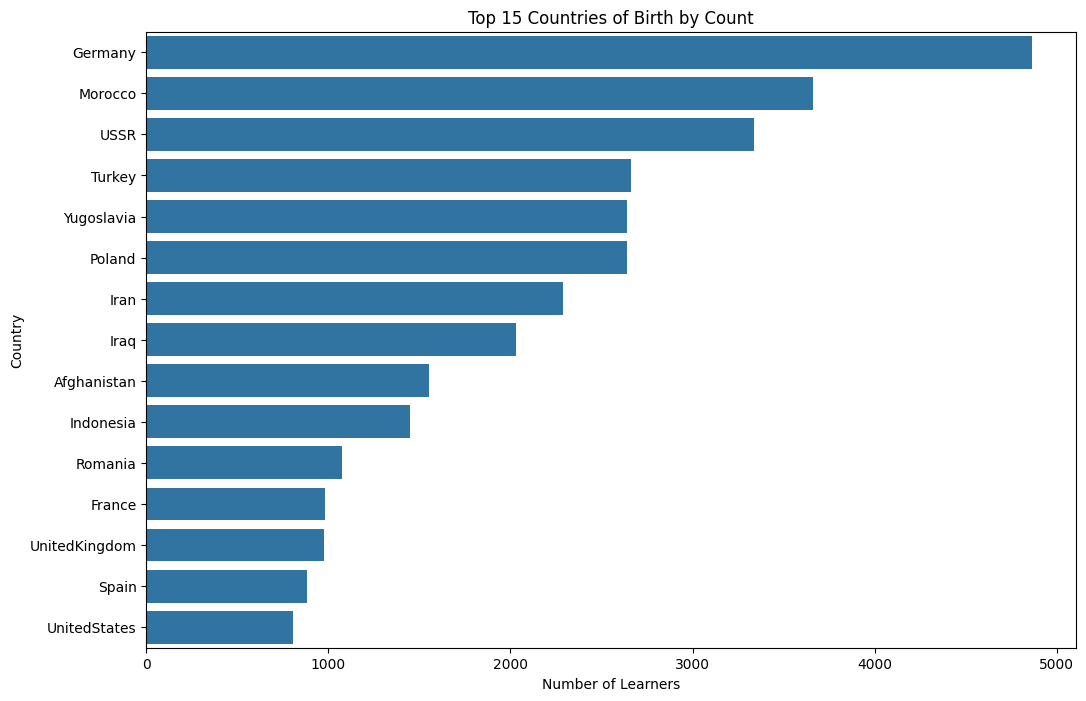

In [30]:
top_15_countries = data['C'].value_counts().head(15)
plt.figure(figsize=(12, 8))
sns.barplot(y=top_15_countries.index, x=top_15_countries.values)
plt.title('Top 15 Countries of Birth by Count')
plt.xlabel('Number of Learners')
plt.ylabel('Country')
plt.show()

In [31]:
# Filter the data for learners born outside of the Netherlands with age of arrival of 5 or younger
learners_outside_netherlands_aaa_5_or_younger = data[(data["C"] != "Netherlands") & (data["AaA"] <= 5)]

# Get the count of such learners
count_learners_outside_netherlands_aaa_5_or_younger = learners_outside_netherlands_aaa_5_or_younger.shape[0]
print("Learners who arrived in the Netherlands before 5 years old:", count_learners_outside_netherlands_aaa_5_or_younger)

Learners who arrived in the Netherlands before 5 years old: 249


In [32]:
# Group the data by country and get the speaking scores for each country
country_groups = data.groupby('C')['Speaking'].apply(list)

# Perform ANOVA
f_stat, p_value_country = f_oneway(*country_groups)

print(f"ANOVA Results: F-statistic = {f_stat}, p-value = {p_value_country}")

ANOVA Results: F-statistic = 149.2313741305954, p-value = 0.0


### The country of birth presents some problems, particularly in relation to country names being outdated (such as "USSR"), or countries which no longer exist (such as "Yugoslavia"). However, some of the learners are older, such as in their 80's, and the country names may have been accurate at the time they were born. Furthermore, the country of birth may not have had much impact on the learners overall; some learners, for example, were born in one country but then arrived in the Netherlands at a very young age. There is also no real-world 1-to-1 match of country with native language - a person may be born in a country with a majority- or even officially-spoken language but may speak an entirely different native language. Therefore, country should not be given much emphasis in this EDA. 

### *What are the learners' most-spoken native languages?*

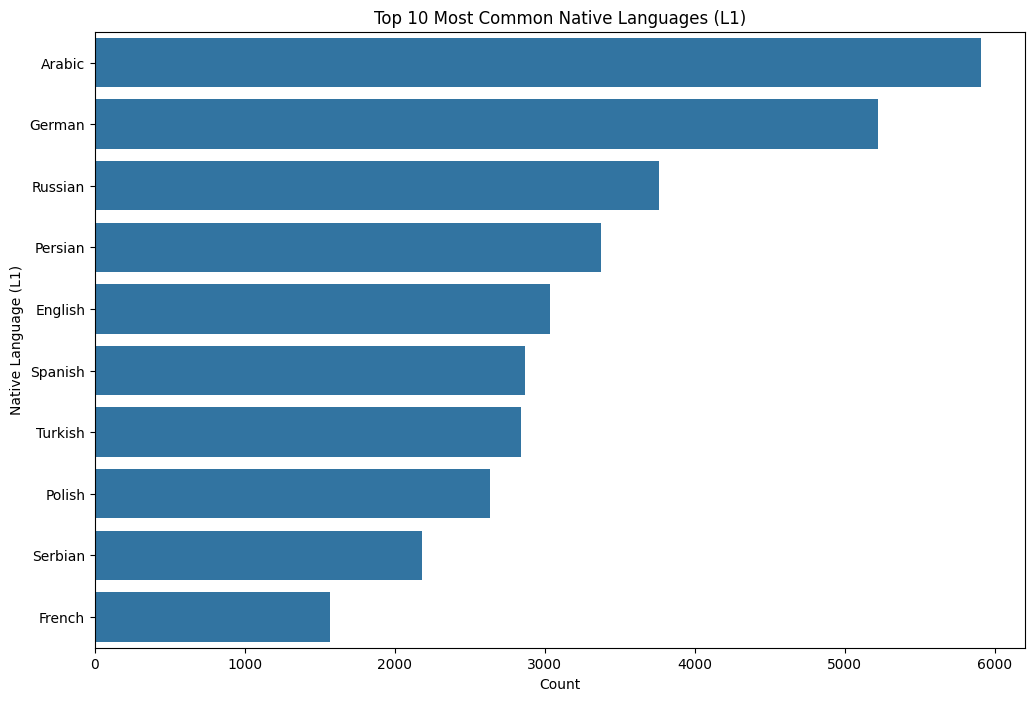

In [33]:
plt.figure(figsize=(12, 8))
top_10_L1 = data['L1'].value_counts().head(10)
sns.barplot(y=top_10_L1.index, x=top_10_L1.values)
plt.title('Top 10 Most Common Native Languages (L1)')
plt.xlabel('Count')
plt.ylabel('Native Language (L1)')
plt.show()

### *What are the learners' least-spoken native languages?*

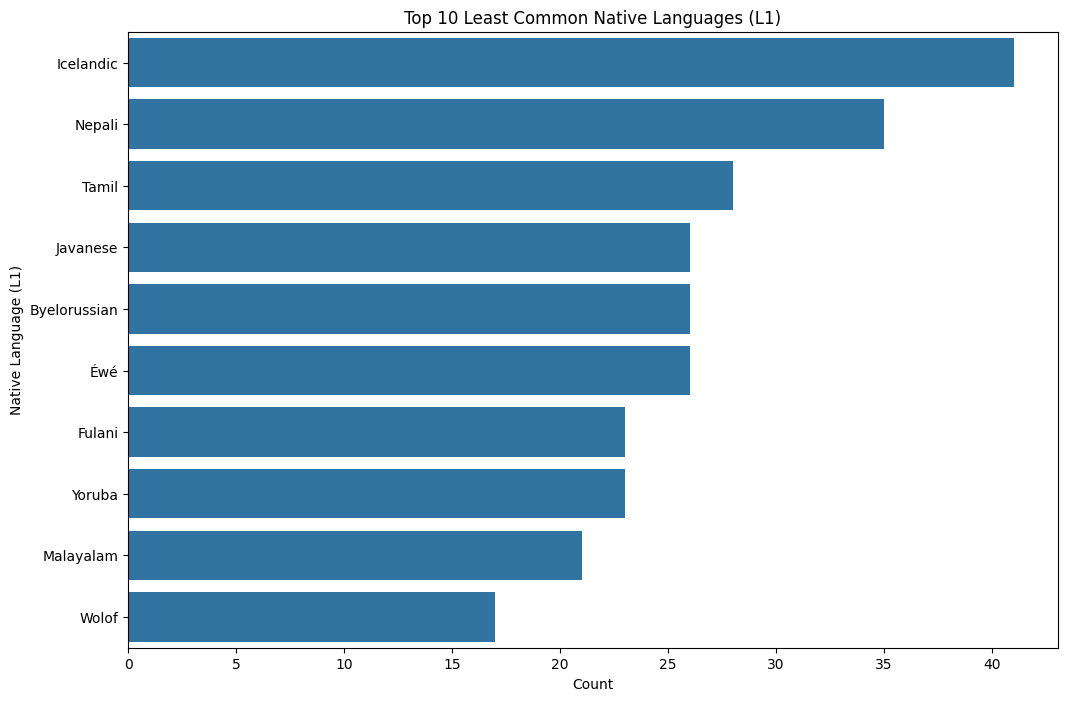

In [34]:
plt.figure(figsize=(12, 8))
bottom_10_L1 = data['L1'].value_counts().tail(10)
sns.barplot(y=bottom_10_L1.index, x=bottom_10_L1.values)
plt.title('Top 10 Least Common Native Languages (L1)')
plt.xlabel('Count')
plt.ylabel('Native Language (L1)')
plt.show()

### *When did the learners arrive in the Netherlands?*

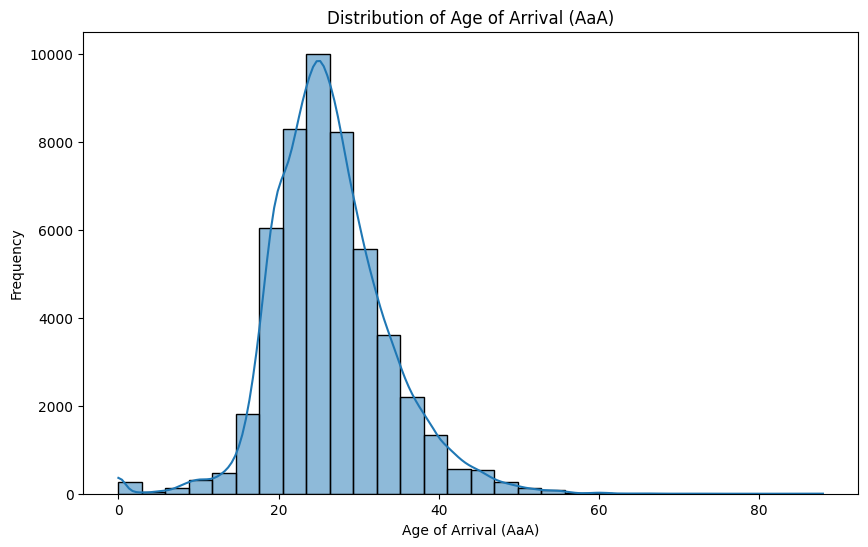

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='AaA', bins=30, kde=True)
plt.title('Distribution of Age of Arrival (AaA)')
plt.xlabel('Age of Arrival (AaA)')
plt.ylabel('Frequency')
plt.show()

### *How long have learners lived in the Netherlands?*

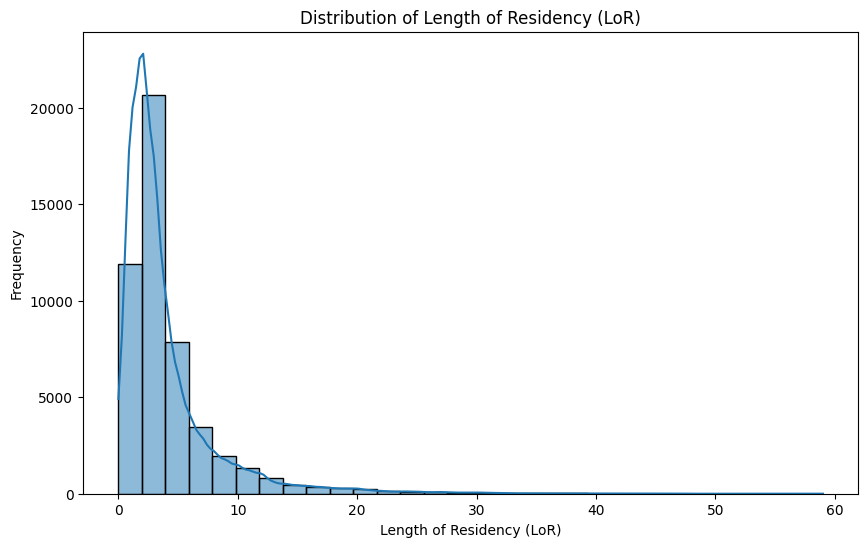

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='LoR', bins=30, kde=True)
plt.title('Distribution of Length of Residency (LoR)')
plt.xlabel('Length of Residency (LoR)')
plt.ylabel('Frequency')
plt.show()

### *What education level do learners have?*

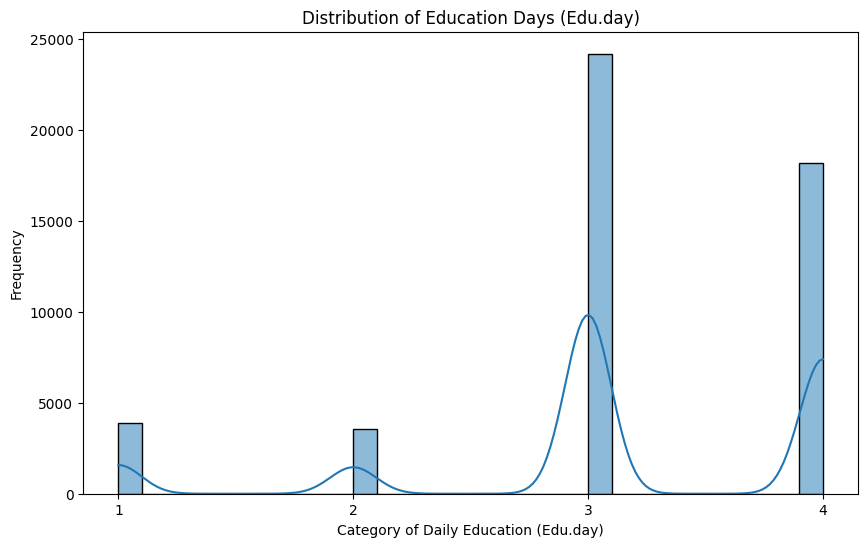

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Edu.day', bins=30, kde=True)
plt.title('Distribution of Education Days (Edu.day)')
plt.xlabel('Category of Daily Education (Edu.day)')
plt.ylabel('Frequency')
plt.xticks([1, 2, 3, 4])
plt.show()

### Note on Category Meaning:
#### -*1: 0-5 years*
#### -*2: 6-10 years*
#### -*3: 11-15 years*
#### -*4: 16+ years*


### Motivations for taking exam: not all learners may be taking the exam because it is required; the Netherlands also allows for "voluntary" integration, such as for those seeking higher education, employment requirements, or to access higher-residency status (such as citizenship)


## Learner Landscape: Key Observations

### Native language and L2 is much more important than country of origin, especially given the problems with country information

### Language transference can boost but not guarantee learner success

### The learners are overall highly or very highly educated, so they are cognitively capable of language acquisition


## Understanding the Speaking Score

### *How did the learners perform on the speaking test overall?*

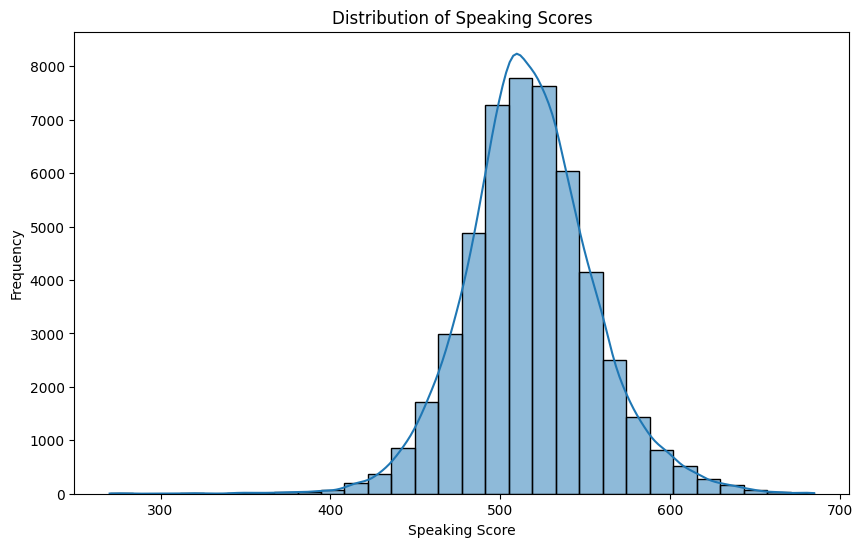

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Speaking', bins=30, kde=True)
plt.title('Distribution of Speaking Scores')
plt.xlabel('Speaking Score')
plt.ylabel('Frequency')
plt.show()

### *How is the speaking score correlated with other factors?*

### *Sex*

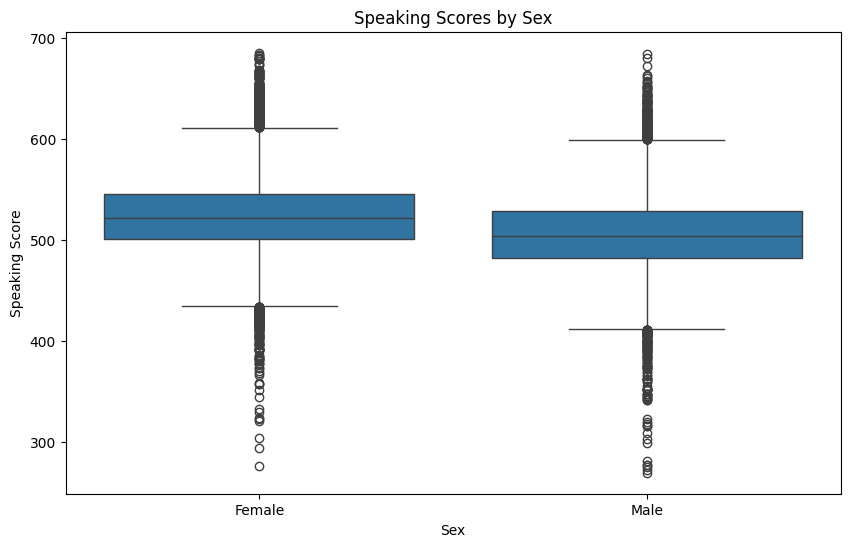

In [39]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Sex', y='Speaking')
plt.title('Speaking Scores by Sex')
plt.xlabel('Sex')
plt.ylabel('Speaking Score')
plt.show()

In [44]:
# Get the speaking scores for each sex
female_speaking_scores = data[data['Sex'] == 'Female']['Speaking']
male_speaking_scores = data[data['Sex'] == 'Male']['Speaking']

# Calculate the mean and standard deviation of speaking scores for each sex
mean_female = female_speaking_scores.mean()
std_female = female_speaking_scores.std()
mean_male = male_speaking_scores.mean()
std_male = male_speaking_scores.std()

# Calculate the number of samples for each sex
n_female = len(female_speaking_scores)
n_male = len(male_speaking_scores)

# Check if standard deviations and sample sizes are not zero
if std_female != 0 and std_male != 0 and n_female != 0 and n_male != 0:
	# Calculate the z-test statistic
	z_test_stat_sex = (mean_female - mean_male) / ((std_female**2 / n_female + std_male**2 / n_male) ** 0.5)

	# Calculate the p-value
	p_value_sex = 2 * (1 - norm.cdf(abs(z_test_stat_sex)))

	print(f"Z-Test Statistic for Speaking Score vs Sex: {z_test_stat_sex}")
	print(f"P-Value for Speaking Score vs Sex: {p_value_sex}")
else:
	print("Standard deviation or sample size is zero, cannot perform z-test.")

Z-Test Statistic for Speaking Score vs Sex: 51.56720064772813
P-Value for Speaking Score vs Sex: 0.0


### Females performed overall better than males, and the difference is highly statistically significant.

### *Age of Arrival*

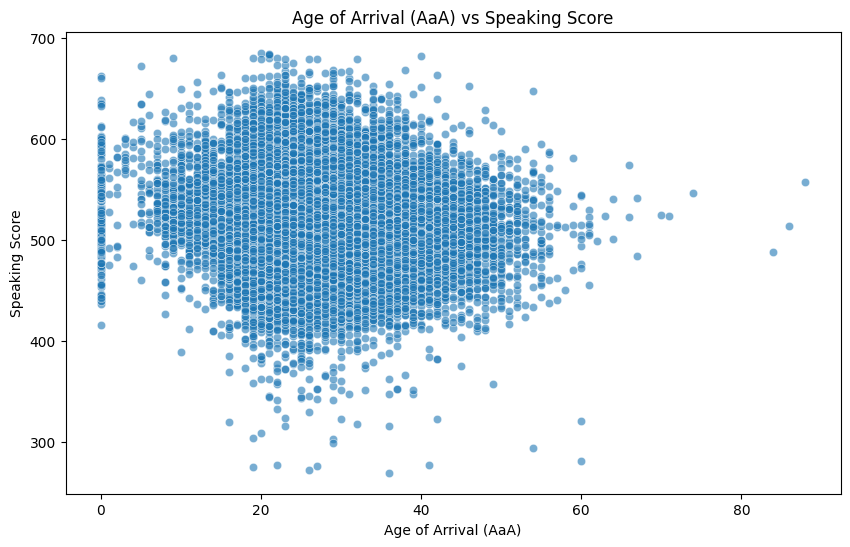

In [411]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='AaA', y='Speaking', alpha=0.6)
plt.title('Age of Arrival (AaA) vs Speaking Score')
plt.xlabel('Age of Arrival (AaA)')
plt.ylabel('Speaking Score')
plt.show()

In [416]:
from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient
pearson_corr, p_value = pearsonr(data['AaA'], data['Speaking'])

print(f"Pearson Correlation Coefficient: {pearson_corr}")
print(f"P-Value: {p_value}")

Pearson Correlation Coefficient: -0.13827367824441025
P-Value: 1.7741357911264393e-211


### Age of Arrival is inversly related to speaking score, although not strongly, and the correlation is statistically significant.

### *Length of Residency*

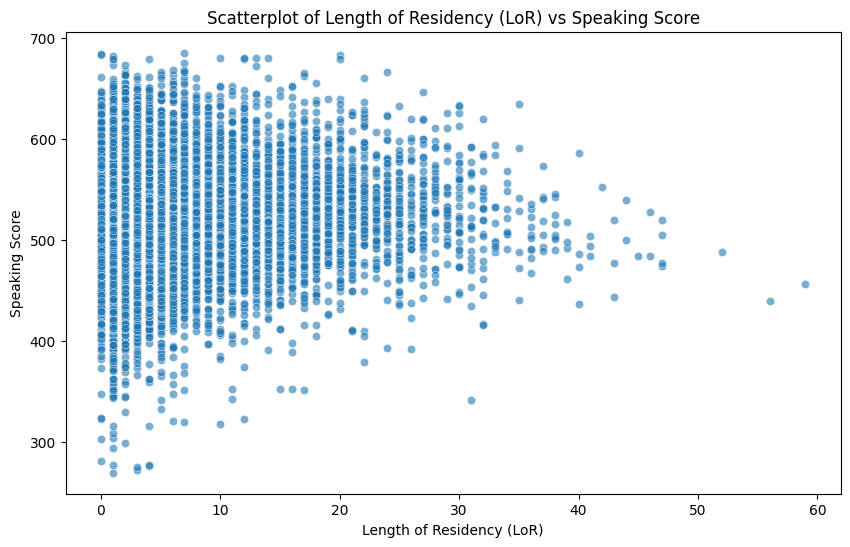

In [328]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='LoR', y='Speaking', alpha=0.6)
plt.title('Scatterplot of Length of Residency (LoR) vs Speaking Score')
plt.xlabel('Length of Residency (LoR)')
plt.ylabel('Speaking Score')
plt.show()

C:\Users\jessi\AppData\Local\Temp\ipykernel_26048\1391319590.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=data, x='LoR', y='Speaking', scale='width', inner=None)


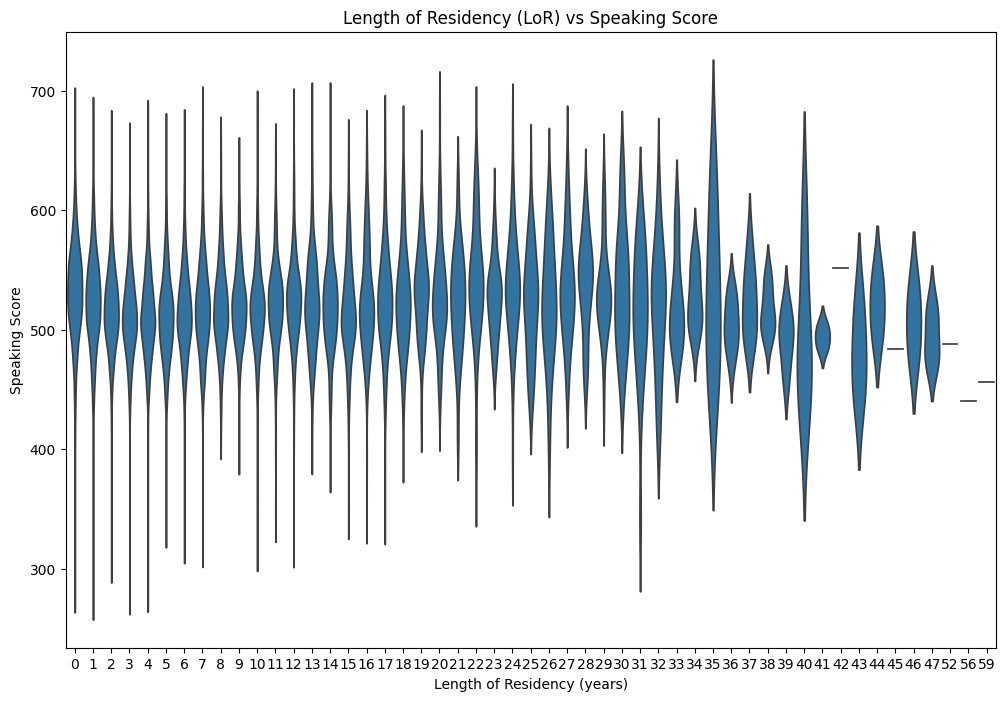

In [420]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=data, x='LoR', y='Speaking', scale='width', inner=None)
plt.title('Length of Residency (LoR) vs Speaking Score')
plt.xlabel('Length of Residency (years)')
plt.ylabel('Speaking Score')
plt.show()

In [418]:
# Calculate the Pearson correlation coefficient
pearson_corr, p_value = pearsonr(data['LoR'], data['Speaking'])

print(f"Pearson Correlation Coefficient: {pearson_corr}")
print(f"P-Value: {p_value}")

Pearson Correlation Coefficient: 0.007862872946603093
P-Value: 0.07902342319706313


In [270]:

# Calculate the z-scores for Length of Residency (LoR) and Speaking Score
data['LoR_zscore'] = zscore(data['LoR'])
data['Speaking_zscore'] = zscore(data['Speaking'])

# Calculate the correlation between the z-scores
correlation_LoR_Speaking = data[['LoR_zscore', 'Speaking_zscore']].corr().iloc[0, 1]

# Calculate the z-test statistic
z_test_stat_LoR_Speaking = correlation_LoR_Speaking * (len(data) ** 0.5)

# Calculate the p-value
p_value_LoR_Speaking = 2 * (1 - norm.cdf(abs(z_test_stat_LoR_Speaking)))

print(f"Z-Test Statistic for LoR vs Speaking Score: {z_test_stat_LoR_Speaking}")
print(f"P-Value for LoR vs Speaking Score: {p_value_LoR_Speaking}")

Z-Test Statistic for LoR vs Speaking Score: 1.7563975694818674
P-Value for LoR vs Speaking Score: 0.0790205475755621


### Length of residency is positively correlated the speaking score. The correlation is not statistically significant, but it is just over the threshold, so should still be considered impactful in our EDA. 


### *Native Language*

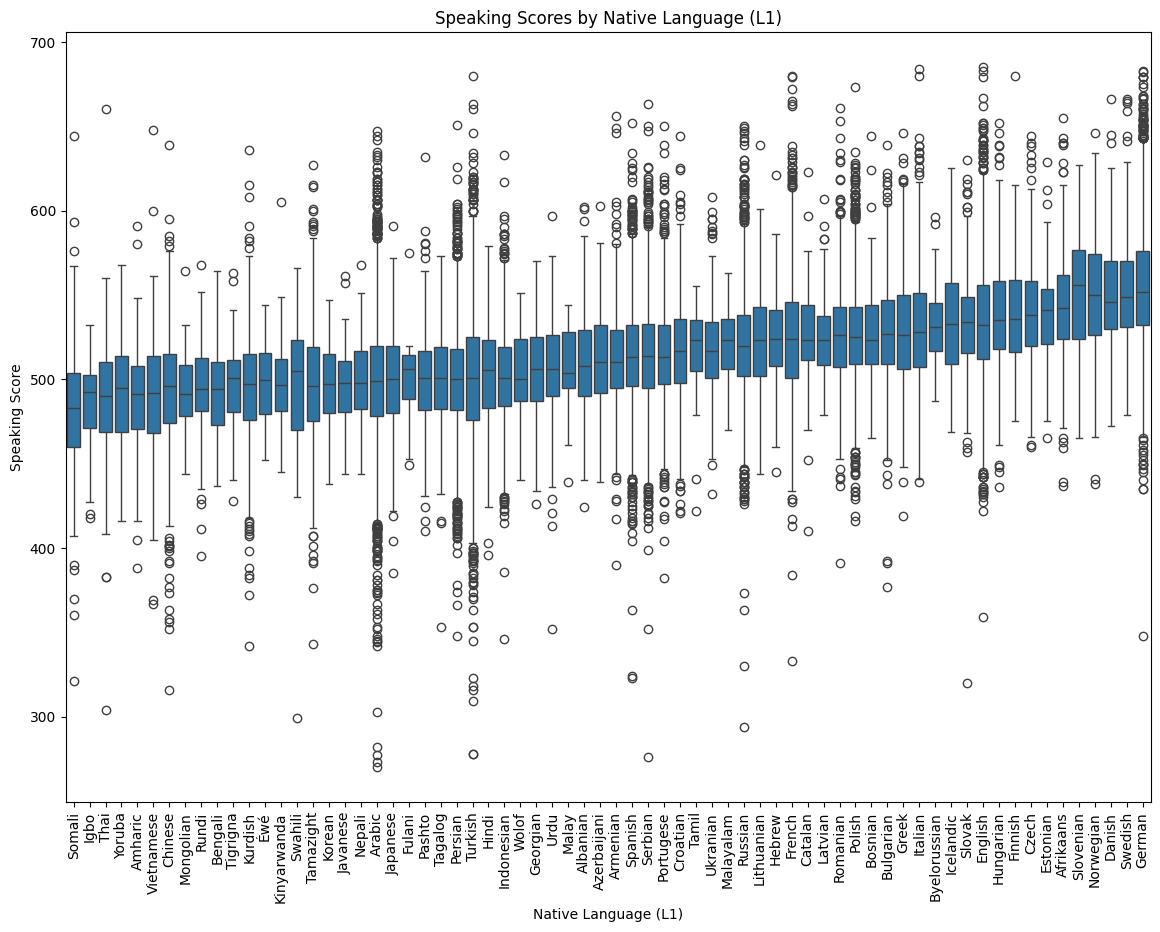

In [423]:
# Calculate the mean speaking score for each native language (L1)
mean_speaking_by_L1 = data.groupby('L1')['Speaking'].mean().sort_values(ascending=True)

# Plot the box plot of speaking scores by native language (L1) sorted by mean speaking score
plt.figure(figsize=(14, 10))
sns.boxplot(data=data, x='L1', y='Speaking', order=mean_speaking_by_L1.index)
plt.xticks(rotation=90)
plt.title('Speaking Scores by Native Language (L1)')
plt.xlabel('Native Language (L1)')
plt.ylabel('Speaking Score')
plt.show()

In [331]:
# Group the data by native language and get the speaking scores for each language
l1_groups = data.groupby('L1')['Speaking'].apply(list)

# Perform ANOVA
f_stat_l1, p_value_l1 = f_oneway(*l1_groups)

print(f"ANOVA Results for Native Language vs Speaking Score: F-statistic = {f_stat_l1}, p-value = {p_value_l1}")

ANOVA Results for Native Language vs Speaking Score: F-statistic = 250.69683307741494, p-value = 0.0


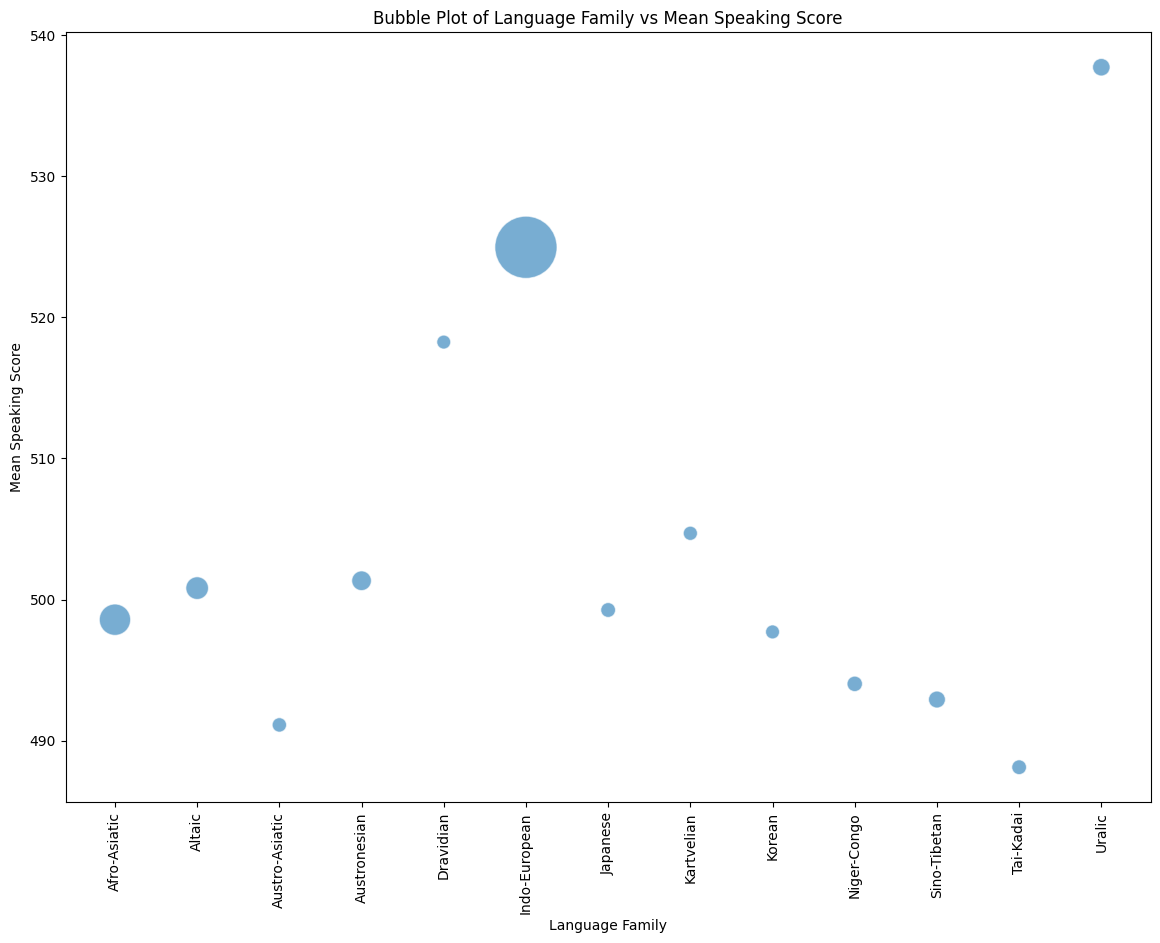

In [273]:
# Calculate the mean speaking score and the number of learners for each language family
mean_speaking_by_family = data.groupby('Family')['Speaking'].mean().sort_values(ascending=True)
count_by_family = data['Family'].value_counts()

# Create a DataFrame for plotting
family_stats = pd.DataFrame({
    'Mean_Speaking_Score': mean_speaking_by_family,
    'Learner_Count': count_by_family
}).reset_index()

# Plot the bubble plot
plt.figure(figsize=(14, 10))
sns.scatterplot(data=family_stats, x='Family', y='Mean_Speaking_Score', size='Learner_Count', sizes=(100, 2000), legend=False, alpha=0.6)
plt.xticks(rotation=90)
plt.title('Bubble Plot of Language Family vs Mean Speaking Score')
plt.xlabel('Language Family')
plt.ylabel('Mean Speaking Score')
plt.show()

In [332]:
# Group the data by language family and get the speaking scores for each family
family_groups = data.groupby('Family')['Speaking'].apply(list)

# Perform ANOVA
f_stat_family, p_value_family = f_oneway(*family_groups)

print(f"ANOVA Results for Family vs Speaking Score: F-statistic = {f_stat_family}, p-value = {p_value_family}")

ANOVA Results for Family vs Speaking Score: F-statistic = 494.0588394861615, p-value = 0.0


### The learner's native language is correlated with speaking score, and the correlation is highly statistically significant. However, the original study in which the dataset was found deals specifically with the linguistic aspects of the native languages and how these correlate with speaking proficiency. Therefore, we will consider learner language in our Key Observations and Strategic Recommendations, but we will otherwise not dive more deeply into specific aspects of the languages. 

### *L2*

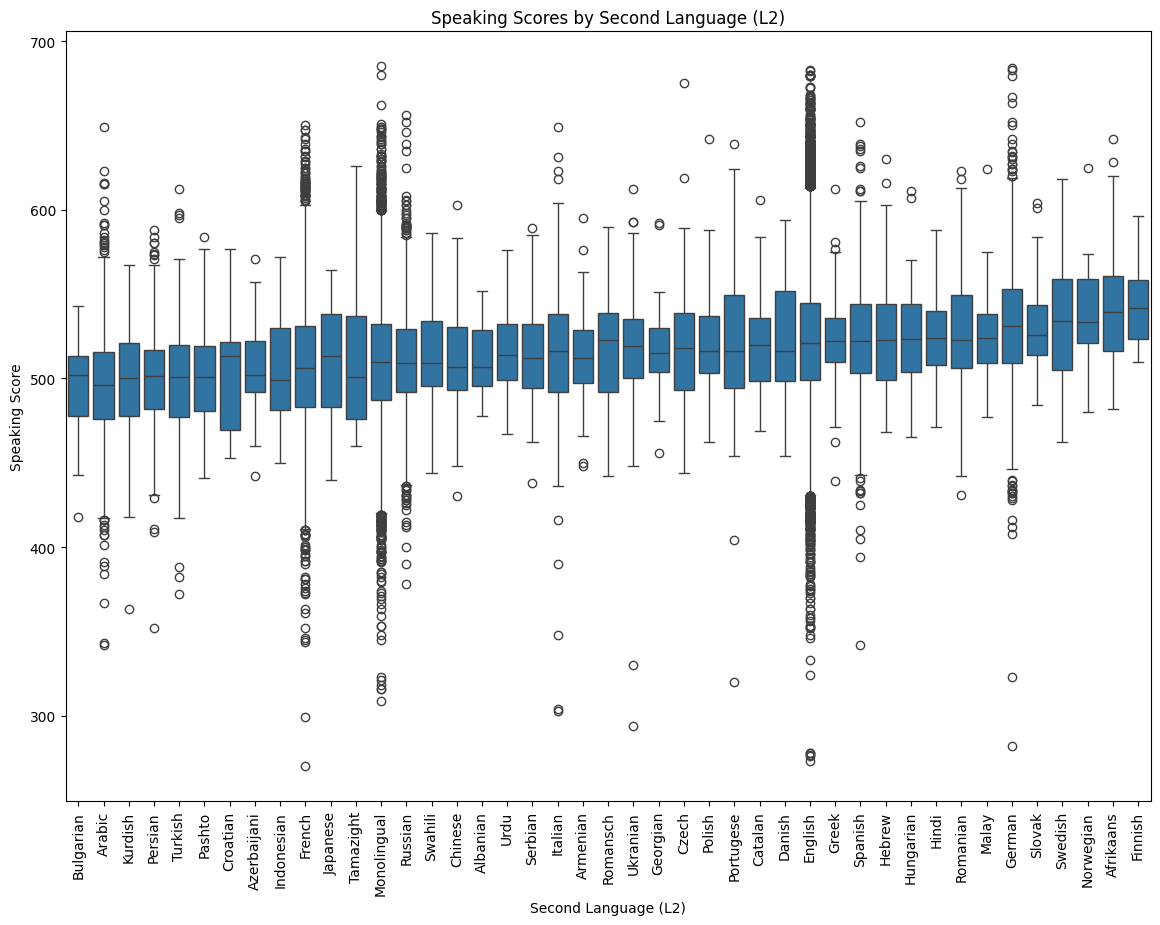

In [421]:
# Calculate the mean speaking score for each second language (L2)
mean_speaking_by_L2 = data.groupby('L2')['Speaking'].mean().sort_values(ascending=True)

# Plot the box plot of speaking scores by second language (L2) sorted by mean speaking score
plt.figure(figsize=(14, 10))
sns.boxplot(data=data, x='L2', y='Speaking', order=mean_speaking_by_L2.index)
plt.xticks(rotation=90)
plt.title('Speaking Scores by Second Language (L2)')
plt.xlabel('Second Language (L2)')
plt.ylabel('Speaking Score')
plt.show()

In [396]:
# Group the data by second language and get the speaking scores for each language
l2_groups = data.groupby('L2')['Speaking'].apply(list)

# Perform ANOVA
f_stat_l1, p_value_l1 = f_oneway(*l1_groups)

print(f"ANOVA Results for Second Language vs Speaking Score: F-statistic = {f_stat_l1}, p-value = {p_value_l1}")

ANOVA Results for Second Language vs Speaking Score: F-statistic = 250.69683307741494, p-value = 0.0


### The learners' second most proficient language other than their native language is correlated with their Speaking Score, and the correlation is statistically significant. Studies, such as Kang, et al. (2021) have found that one factor that indicates success in learning a foreign language is previous language learning success; that is, the more languages a person learn, the better they get at learning languages. This is supported by "Monolingual" (ie, a learner who has no other second-language learning experience other than Dutch) being found to the left of the graph, amongst the poorer performing learners. 

### *Education Level*

C:\Users\jessi\AppData\Local\Temp\ipykernel_26048\3160697876.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=data, x='Edu.day', y='Speaking', scale='width', inner=None)


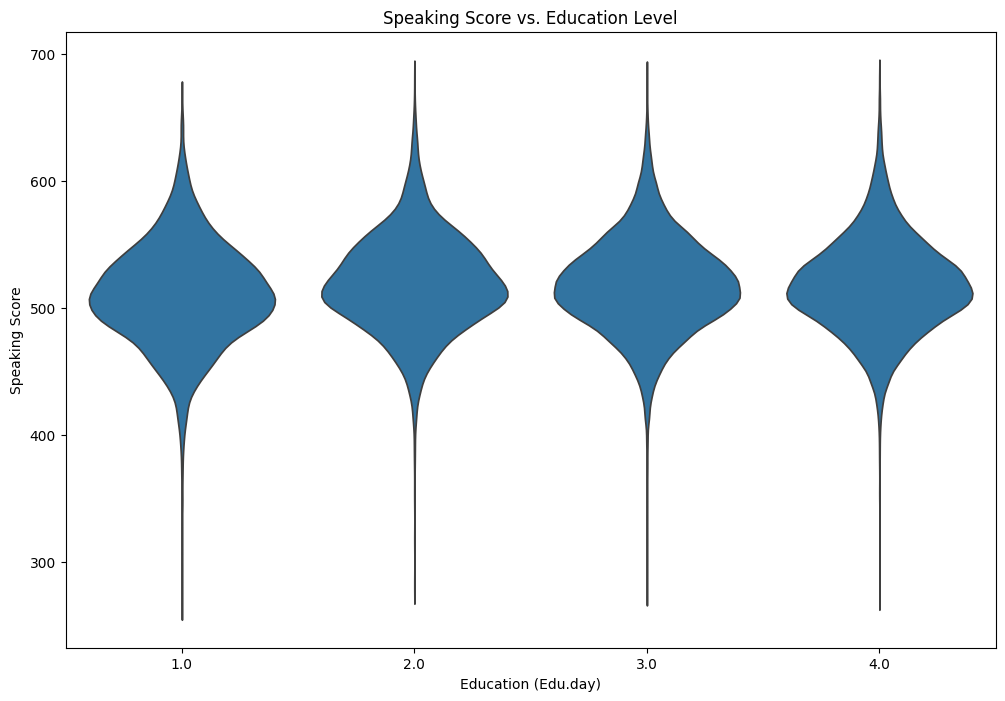

In [426]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=data, x='Edu.day', y='Speaking', scale='width', inner=None)
plt.title('Speaking Score vs. Education Level')
plt.xlabel('Education (Edu.day)')
plt.ylabel('Speaking Score')
plt.show()

In [425]:
from scipy.stats import f_oneway

# Group the data by Edu.day and get the speaking scores for each education day category
edu_day_groups = data.groupby('Edu.day')['Speaking'].apply(list)

# Perform ANOVA
f_stat_edu_day, p_value_edu_day = f_oneway(*edu_day_groups)

print(f"ANOVA Results for Edu.day vs Speaking Score: F-statistic = {f_stat_edu_day}, p-value = {p_value_edu_day}")

ANOVA Results for Edu.day vs Speaking Score: F-statistic = 54.412762835154034, p-value = 4.182155189294792e-35


### Education level is positively correlated the speaking score, and the correlation is statistically significant.

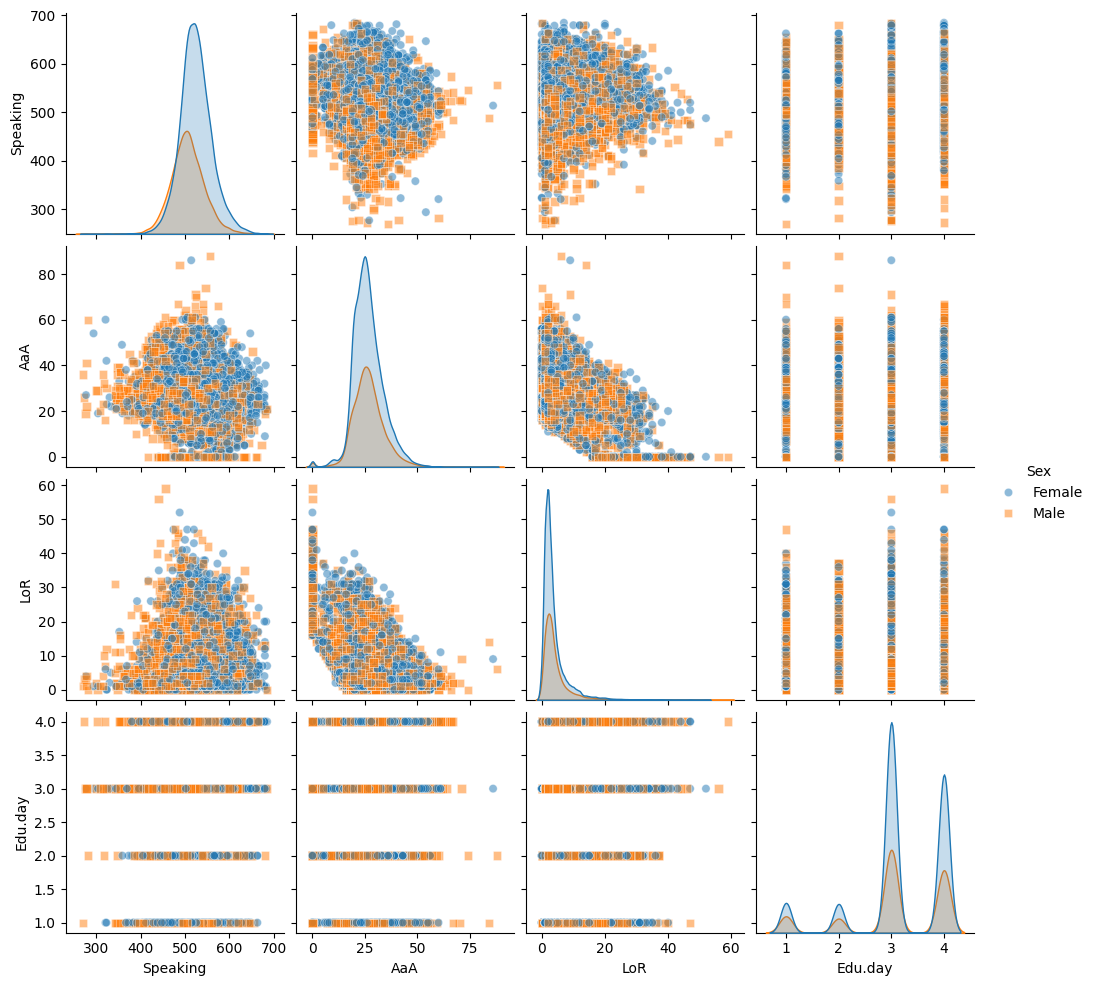

In [424]:
# Select relevant columns for the correlogram
correlogram_data = data[['Speaking', 'AaA', 'LoR', 'Edu.day', 'Sex']]

# Create the pairplot
sns.pairplot(correlogram_data, hue='Sex', diag_kind='kde', markers=["o", "s"], plot_kws={'alpha':0.5})

# Show the plot
plt.show()

## The Speaking Score & Correlations: Key Observations

### The positive skew of the speaking score may suggest that significant numbers of real-world learners are not included in the data (e.g., they knew they would not pass so chose not to take the exam). ==> *We should remain “open-minded” about sample sizes*

### Language is highly correlated with proficiency (p-value = 0.0), but cannot (and should not) be isolated as the cause of success/failure – sex, age of arrival, length of residency, and education help map the cultural-linguistic landscape. ==> *Male and female learners should be considered separately*

## Zooming in on the Poorest Performing Learners

### *Defining Poor Performance*

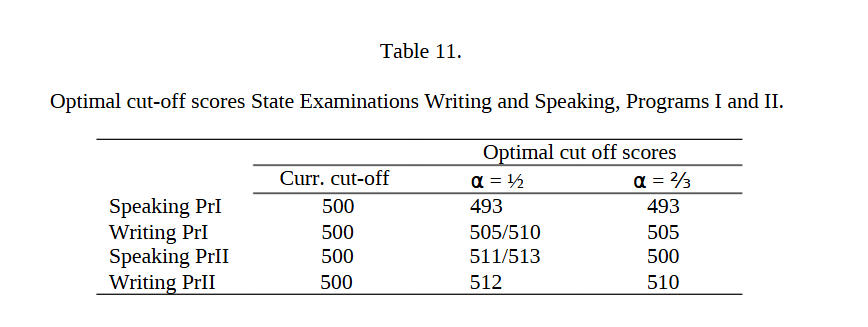

In [334]:
from IPython.display import Image

# Display an image
Image(filename='/Users/jessi/OneDrive/Data_Science/CodeOp/IndividualProject/CutScores_Optimal.png')

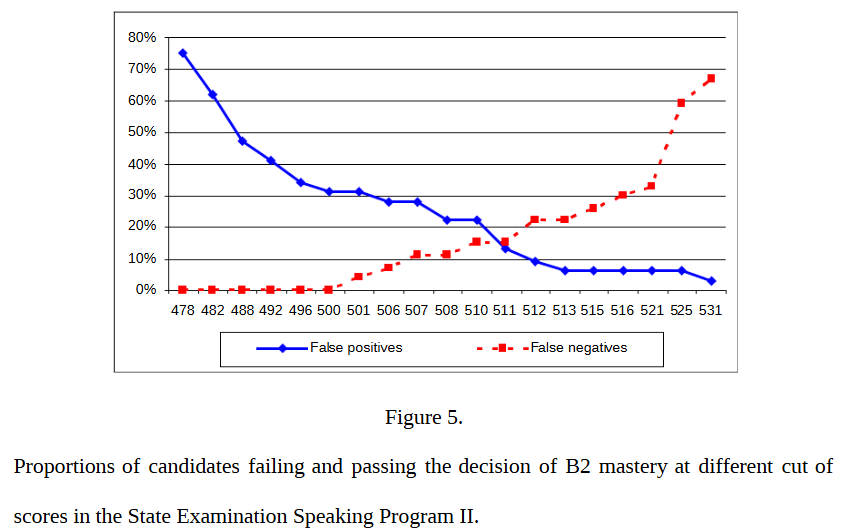

In [335]:

Image(filename='/Users/jessi/OneDrive/Data_Science/CodeOp/IndividualProject/CutScores_FalsePositivesFalseNegatives.png')


### In their paper, "Standard Setting in Relation to the Common European Framework of Reference for Languages: The Case of the State Examination of Dutch as a Second Language", Bechger, et al. (2009) discuss how STEX scores correspond to the Common European Framework of Reference (CEFR) and whether the previously-used cut-off score of 500 was adequate. Through their data analysis, they suggested that a cut score of 511 or 513 would lead to fewer false positives and false negatives, respectively. Our current data analysis is principally concerned with learners who are not acheiving language proficiency, which therefore means we need to avoid false positives as much as possible. We will therefore use 511 as our cut-off score, meaning we will from here-on only be looking at learners with scores of 510 or lower  

In [336]:
# Filter the data
low_performers = data[data['Speaking'] <= 510]

low_performers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21576 entries, 0 to 50233
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   L1               21576 non-null  object 
 1   C                21576 non-null  object 
 2   L1L2             21576 non-null  object 
 3   L2               21576 non-null  object 
 4   AaA              21576 non-null  int64  
 5   LoR              21576 non-null  int64  
 6   Edu.day          21576 non-null  float64
 7   Sex              21576 non-null  object 
 8   Family           21576 non-null  object 
 9   ISO639.3         21576 non-null  object 
 10  Enroll           21576 non-null  int64  
 11  Speaking         21576 non-null  int64  
 12  morph            20967 non-null  float64
 13  lex              21576 non-null  float64
 14  new_feat         20796 non-null  float64
 15  new_sounds       20796 non-null  float64
 16  AaA_zscore       21576 non-null  float64
 17  Speaking_zscore  

In [522]:

low_performers['Sex'].value_counts()


Sex
Female    11895
Male       9681
Name: count, dtype: int64

### Filtering our data for low performers yeilds a dataset with 21,576 learners (male = 9681, female = 11895). Now that these low performers have been isolated, we can look at the factors that may correspond specifically to lower performance.

### *Sex vs Low Speaking Scores*

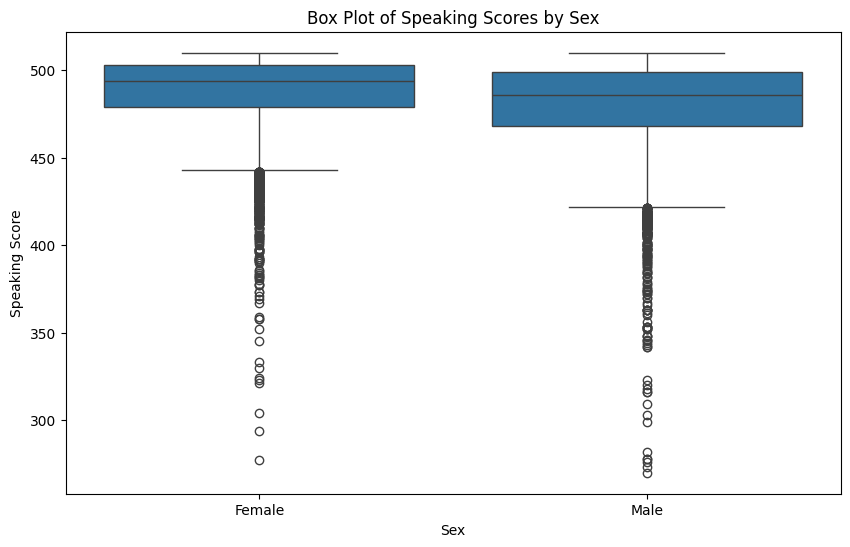

In [338]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=low_performers, x='Sex', y='Speaking')
plt.title('Box Plot of Speaking Scores by Sex')
plt.xlabel('Sex')
plt.ylabel('Speaking Score')
plt.show()

### As with our overall learners, our low performers show that there is a significant difference between males and females, with males performing overall lower. In light of this, all further data analysis will break down the data between male and female learners.     

## Male Poor Performers

C:\Users\jessi\AppData\Local\Temp\ipykernel_26048\3693280583.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_low_performers['AaA_binned'] = pd.cut(male_low_performers['AaA'], bins=aaa_bins, labels=aaa_labels, right=False)
C:\Users\jessi\AppData\Local\Temp\ipykernel_26048\3693280583.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_low_performers['LoR_binned'] = pd.cut(male_low_performers['LoR'], bins=lor_bins, labels=lor_labels, right=False)
C:\Users\jessi\AppData\Local\Temp\ipykernel_2604

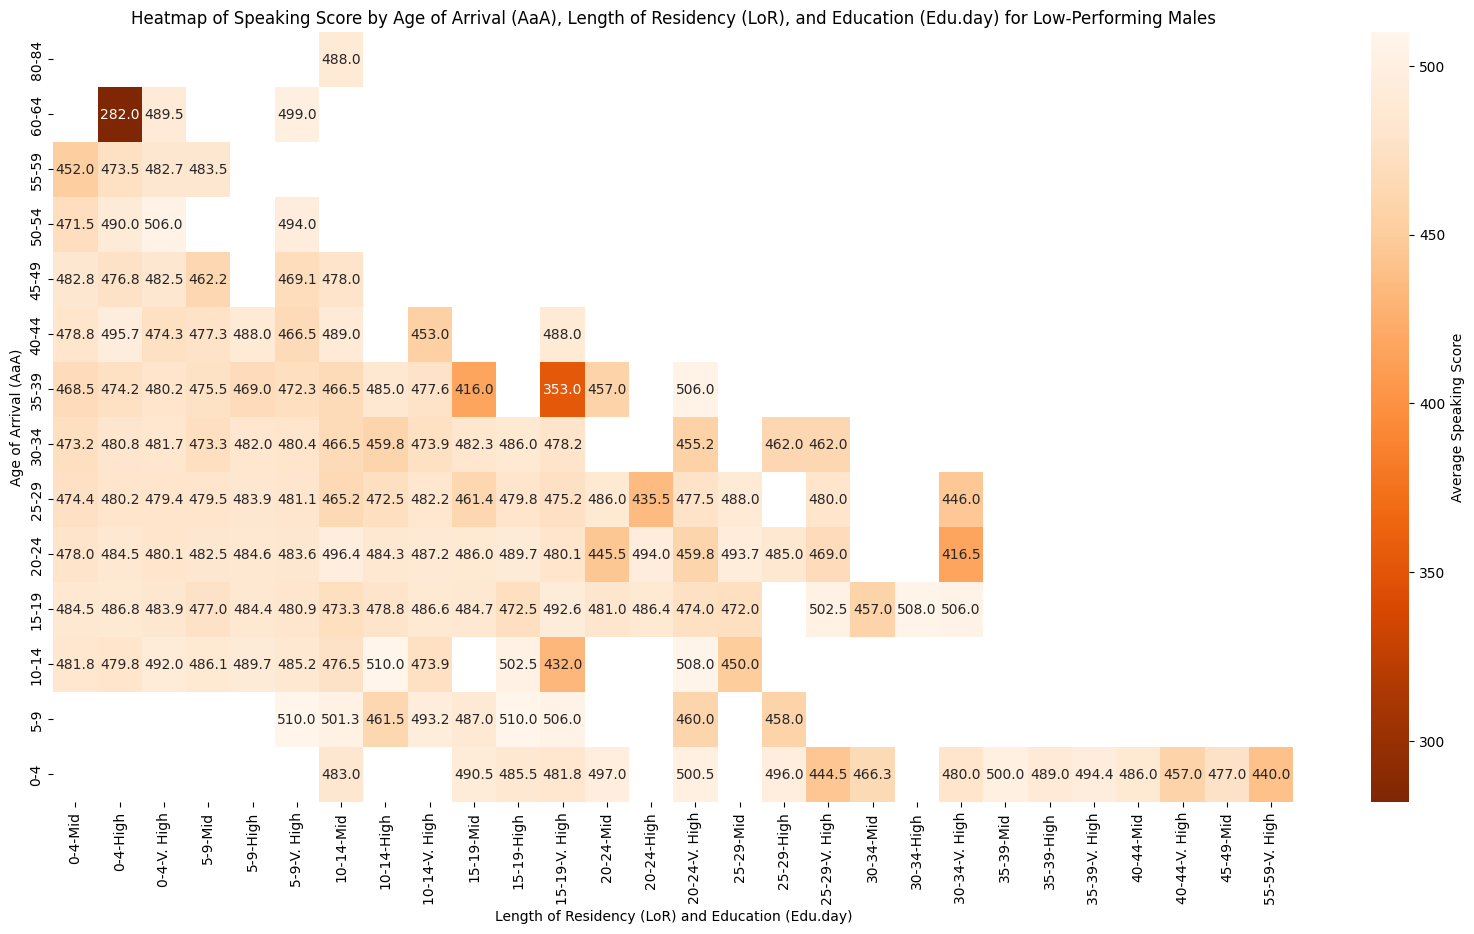

In [440]:
# Filter the data for males with speaking score <= 510
male_low_performers = data[(data['Sex'] == 'Male') & (data['Speaking'] <= 510)]

# Create bins for AaA, LoR, and Edu.day
aaa_bins = range(0, 91, 5)
lor_bins = range(0, 91, 5)
edu_day_bins = range(0, 5)

# Create labels for the bins
aaa_labels = [f'{i}-{i+4}' for i in range(0, 90, 5)]
lor_labels = [f'{i}-{i+4}' for i in range(0, 90, 5)]
edu_day_labels = ['Low', 'Mid', 'High', 'V. High']

# Bin the data
male_low_performers['AaA_binned'] = pd.cut(male_low_performers['AaA'], bins=aaa_bins, labels=aaa_labels, right=False)
male_low_performers['LoR_binned'] = pd.cut(male_low_performers['LoR'], bins=lor_bins, labels=lor_labels, right=False)
male_low_performers['Edu_day_binned'] = pd.cut(male_low_performers['Edu.day'], bins=edu_day_bins, labels=edu_day_labels, right=False)

# Create a pivot table for the heatmap
heatmap_data = male_low_performers.pivot_table(index='AaA_binned', columns=['LoR_binned', 'Edu_day_binned'], values='Speaking', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(20, 10))
ax = sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="Oranges_r", cbar_kws={'label': 'Average Speaking Score'})
ax.invert_yaxis()
plt.title('Heatmap of Speaking Score by Age of Arrival (AaA), Length of Residency (LoR), and Education (Edu.day) for Low-Performing Males')
plt.xlabel('Length of Residency (LoR) and Education (Edu.day)')
plt.ylabel('Age of Arrival (AaA)')
plt.show()


### Pockets of concern for males: Young Arrivers with Long Residency: AaA <= 10, LoR >= 40 (now 50+); Young Arrivers with Moderate Residency: AaA <= 14, LoR = 20-30 (now 34-44); Adult Arrivers with Moderate Residency: AaA = 20-39, LoR = 15-34 (35-73); Mature Arrivers with Short Residency: AaA >= 45, LoR <= 9 (now 45+)


### *Male Young Arrivers with Long Residency: AaA <= 10, LoR >= 40*

In [496]:
# Filter the dataset
filtered_young_arrivers_long_residency = data[(data['AaA'] <= 10) & (data['LoR'] >= 40) & (data['Speaking'] <= 510) ]

# Display the filtered dataset
filtered_young_arrivers_long_residency.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 1778 to 47759
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   L1               17 non-null     object 
 1   C                17 non-null     object 
 2   L1L2             17 non-null     object 
 3   L2               17 non-null     object 
 4   AaA              17 non-null     int64  
 5   LoR              17 non-null     int64  
 6   Edu.day          17 non-null     float64
 7   Sex              17 non-null     object 
 8   Family           17 non-null     object 
 9   ISO639.3         17 non-null     object 
 10  Enroll           17 non-null     int64  
 11  Speaking         17 non-null     int64  
 12  morph            16 non-null     float64
 13  lex              17 non-null     float64
 14  new_feat         17 non-null     float64
 15  new_sounds       17 non-null     float64
 16  AaA_zscore       17 non-null     float64
 17  Speaking_zscore  

### *Male Young Arrivers with Moderate Residency: AaA <= 14, LoR = 20-30*

In [497]:
# Filter the dataset
filtered_young_arrivers_mid_residency_male = data[(data['AaA'] <= 14) & (data['LoR'] >= 20) & (data['LoR'] <= 30) & (data['Sex'] == "Male") & (data['Speaking'] <= 510)]

# Display the filtered dataset
filtered_young_arrivers_mid_residency_male.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 2335 to 50113
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   L1               29 non-null     object 
 1   C                29 non-null     object 
 2   L1L2             29 non-null     object 
 3   L2               29 non-null     object 
 4   AaA              29 non-null     int64  
 5   LoR              29 non-null     int64  
 6   Edu.day          29 non-null     float64
 7   Sex              29 non-null     object 
 8   Family           29 non-null     object 
 9   ISO639.3         29 non-null     object 
 10  Enroll           29 non-null     int64  
 11  Speaking         29 non-null     int64  
 12  morph            29 non-null     float64
 13  lex              29 non-null     float64
 14  new_feat         29 non-null     float64
 15  new_sounds       29 non-null     float64
 16  AaA_zscore       29 non-null     float64
 17  Speaking_zscore  

### Although a young arrival age and moderate to long-term residency tend to correlate with lower speaking scores, these two groups combined are only represented by 46 learners. Even with an open-minded approach to target audience size, we may conclude that these learners do not represent a significant portion of the wider landscape of learner situations, and therefore do not hold much impact potential. 

### *Male Adult Arrivers with Moderate Residency: AaA = 20-39, LoR = 15-34*

In [498]:
# Filter the dataset
filtered_mid_arrivers_mid_residency_male = data[(data['AaA'] >= 20) & (data['AaA'] <= 39) & (data['LoR'] >= 15) & (data['LoR'] <= 34) & (data['Sex'] == "Male") & (data['Speaking'] <= 510)]

# Display the filtered dataset
filtered_mid_arrivers_mid_residency_male.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 683 to 50157
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   L1               179 non-null    object 
 1   C                179 non-null    object 
 2   L1L2             179 non-null    object 
 3   L2               179 non-null    object 
 4   AaA              179 non-null    int64  
 5   LoR              179 non-null    int64  
 6   Edu.day          179 non-null    float64
 7   Sex              179 non-null    object 
 8   Family           179 non-null    object 
 9   ISO639.3         179 non-null    object 
 10  Enroll           179 non-null    int64  
 11  Speaking         179 non-null    int64  
 12  morph            175 non-null    float64
 13  lex              179 non-null    float64
 14  new_feat         176 non-null    float64
 15  new_sounds       176 non-null    float64
 16  AaA_zscore       179 non-null    float64
 17  Speaking_zscore  

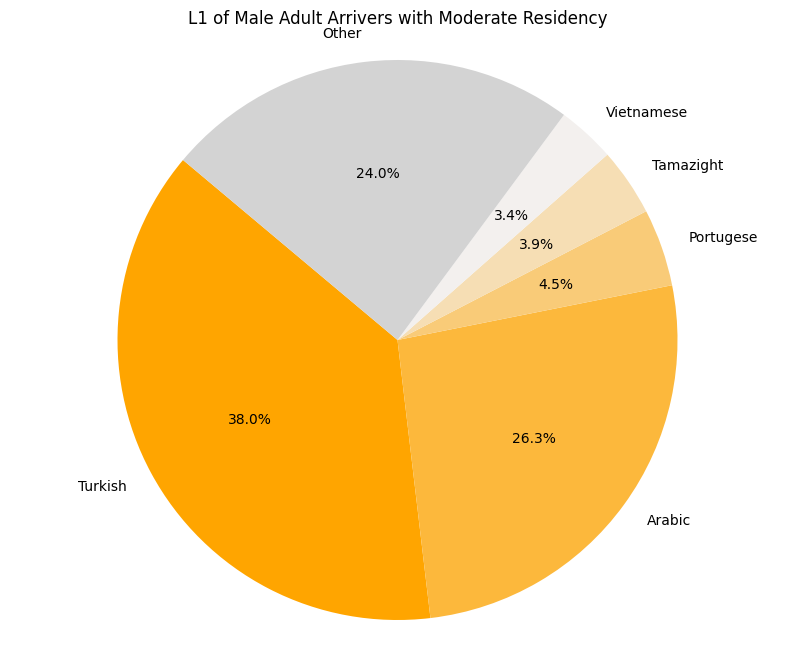

In [513]:
# Calculate the percentage of each L1
l1_counts_mamrm = filtered_mid_arrivers_mid_residency_male['L1'].value_counts()
l1_percentages_mamrm = l1_counts_mamrm / l1_counts_mamrm.sum() * 100

# Separate the languages that are represented by 3% or more
l1_labels_mamrm = l1_percentages_mamrm[l1_percentages_mamrm >= 3].index.tolist()
l1_labels_mamrm.append('Other')

# Group the languages that are represented by less than 3% into "Other"
l1_percentages_mamrm['Other'] = l1_percentages_mamrm[l1_percentages_mamrm < 3].sum()
l1_percentages_mamrm = l1_percentages_mamrm[l1_percentages_mamrm >= 3]

# Define a gradient color scheme with "Other" being light grey and each percentage progressively darker
colors = sns.light_palette("orange", n_colors=len(l1_labels_mamrm) - 1, reverse=True).as_hex()
colors.append("#D3D3D3")  # Light grey for "Other"

# Plot the pie chart
plt.figure(figsize=(10, 8))
plt.pie(l1_percentages_mamrm, labels=l1_labels_mamrm, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('L1 of Male Adult Arrivers with Moderate Residency')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### In contrast to the young arrivers/long residency group, those learners who arrived between 20-39 years of age and have been in the Netherlands for about 2-3 decades represent a larger portion of the overall learner landscape. This higher number (179 male) means these learners represent a more significant portion of the language-learner landscape than the previous group of young arrivers/long residency. One result very interesting to note is the overwhelmingly large percentage of this population who speaks Turkish as a native language (38%), with Arabic also representing a significant portion of this population (26.3%). 

### *Male Mature Arrivers with Short Residency: AaA >= 45, LoR <= 9*

In [499]:
# Filter the dataset
filtered_late_arrivers_short_residency_male = data[(data['AaA'] >= 45) & (data['LoR'] <= 9) & (data['Sex'] == 'Male') & (data['Speaking'] <= 510)]

# Display the filtered dataset
filtered_late_arrivers_short_residency_male.info()

<class 'pandas.core.frame.DataFrame'>
Index: 223 entries, 355 to 50015
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   L1               223 non-null    object 
 1   C                223 non-null    object 
 2   L1L2             223 non-null    object 
 3   L2               223 non-null    object 
 4   AaA              223 non-null    int64  
 5   LoR              223 non-null    int64  
 6   Edu.day          223 non-null    float64
 7   Sex              223 non-null    object 
 8   Family           223 non-null    object 
 9   ISO639.3         223 non-null    object 
 10  Enroll           223 non-null    int64  
 11  Speaking         223 non-null    int64  
 12  morph            208 non-null    float64
 13  lex              223 non-null    float64
 14  new_feat         219 non-null    float64
 15  new_sounds       219 non-null    float64
 16  AaA_zscore       223 non-null    float64
 17  Speaking_zscore  

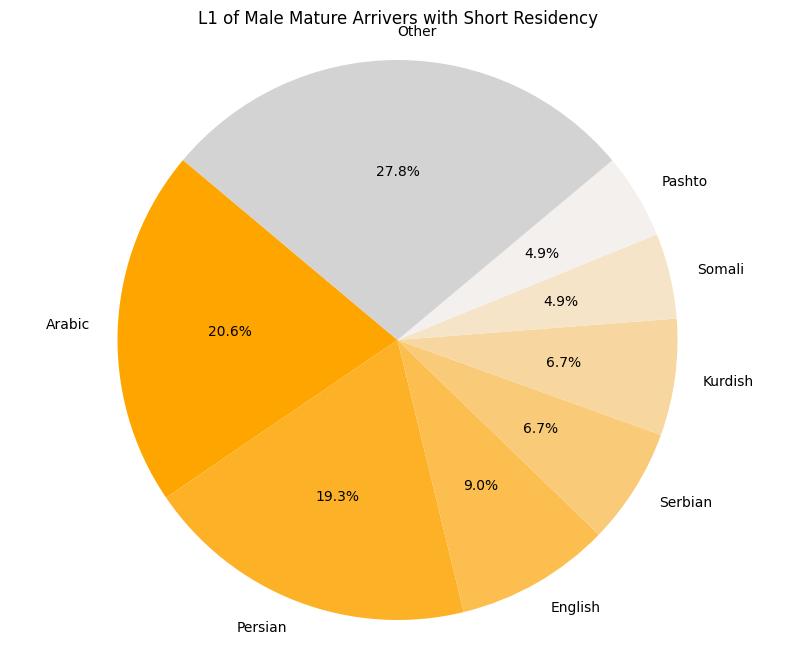

In [505]:
# Calculate the percentage of each L1
l1_counts_lasrm = filtered_late_arrivers_short_residency_male['L1'].value_counts()
l1_percentages_lasrm = l1_counts_lasrm / l1_counts_lasrm.sum() * 100

# Separate the languages that are represented by 3% or more
l1_labels_lasrm = l1_percentages_lasrm[l1_percentages_lasrm >= 3].index.tolist()
l1_labels_lasrm.append('Other')

# Group the languages that are represented by less than 3% into "Other"
l1_percentages_lasrm['Other'] = l1_percentages_lasrm[l1_percentages_lasrm < 3].sum()
l1_percentages_lasrm = l1_percentages_lasrm[l1_percentages_lasrm >= 3]

# Define a gradient color scheme with "Other" being light grey and each percentage progressively darker
colors = sns.light_palette("orange", n_colors=len(l1_labels_lasrm) - 1, reverse=True).as_hex()
colors.append("#D3D3D3")  # Light grey for "Other"

# Plot the pie chart
plt.figure(figsize=(10, 8))
plt.pie(l1_percentages_lasrm, labels=l1_labels_lasrm, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('L1 of Male Mature Arrivers with Short Residency')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Again, in contrast to the first group, those learners who arrived later in life and have been in the Netherlands for a shorter period represent a larger portion of the overall learner landscape. Again, this therefore warrants further analysis of this group's other factors. Among the native language percentages, it is interesting to note the large number of Arabic speakers (20.6%), which is almost matched by the Persian speakers (19.3%). A glance at the kinds of languages combined with socio-political knowledge may also suggest that some learners have migrated to the Netherlands to seek asylum and may be classed as refugees.

## Male Poor Performers: Key Observations

### EU & NL pre-2021 policies for Turkish nationals have severely negatively impacted adult males w/ moderate residency. Prior to 2021, the EU declared it unlawful for the Netherlands to require Turkish nationals to integrate; Turkish-nationals were therefore welcom to voluntarily integrate but were not required to do so. Also, starting in 2021, the Netherlands introduced the Personal Integration Plan (PIP), which addressed each learners' personal situation, suggested an integration pathway (e.g., for education or for residency), and suggested resources (including monetary support). The dataset, however, is from 2019, before this PIP was introduced. Future data analysis of the same population, therefore, may show a change in certain factors as these new policies take effect. 


### Legal procedures (such as seeking asylum) may interfere with proficiency


### Higher education level may push unprepared males to “reach for the stars”


## Female Poor Performers

C:\Users\jessi\AppData\Local\Temp\ipykernel_26048\1156184263.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_low_performers['AaA_binned'] = pd.cut(female_low_performers['AaA'], bins=aaa_bins, labels=aaa_labels, right=False)
C:\Users\jessi\AppData\Local\Temp\ipykernel_26048\1156184263.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_low_performers['LoR_binned'] = pd.cut(female_low_performers['LoR'], bins=lor_bins, labels=lor_labels, right=False)
C:\Users\jessi\AppData\Local\Temp\ipyker

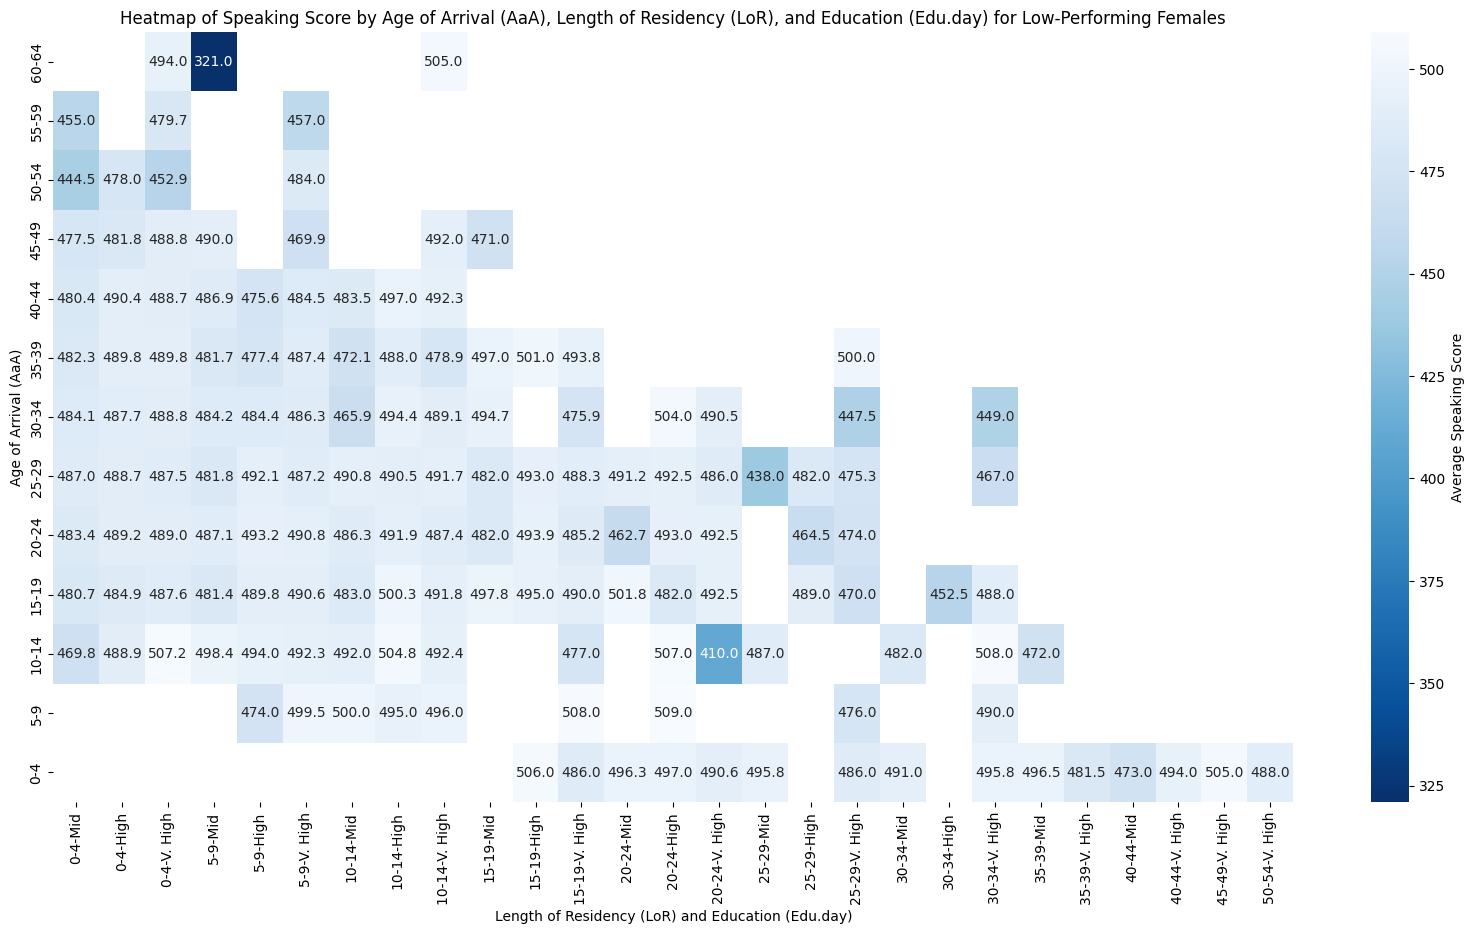

In [470]:
# Filter the data for females with speaking score <= 510
female_low_performers = data[(data['Sex'] == 'Female') & (data['Speaking'] <= 510)]

# Create bins for AaA, LoR, and Edu.day
aaa_bins = range(0, 91, 5)
lor_bins = range(0, 91, 5)
edu_day_bins = range(0, 5)

# Create labels for the bins
aaa_labels = [f'{i}-{i+4}' for i in range(0, 90, 5)]
lor_labels = [f'{i}-{i+4}' for i in range(0, 90, 5)]
edu_day_labels = ['Low', 'Mid', 'High', 'V. High']

# Bin the data
female_low_performers['AaA_binned'] = pd.cut(female_low_performers['AaA'], bins=aaa_bins, labels=aaa_labels, right=False)
female_low_performers['LoR_binned'] = pd.cut(female_low_performers['LoR'], bins=lor_bins, labels=lor_labels, right=False)
female_low_performers['Edu_day_binned'] = pd.cut(female_low_performers['Edu.day'], bins=edu_day_bins, labels=edu_day_labels, right=False)

# Create a pivot table for the heatmap
heatmap_data_female_low_performers = female_low_performers.pivot_table(index='AaA_binned', columns=['LoR_binned', 'Edu_day_binned'], values='Speaking', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(20, 10))
ax = sns.heatmap(heatmap_data_female_low_performers, annot=True, fmt=".1f", cmap="Blues_r", cbar_kws={'label': 'Average Speaking Score'})
ax.invert_yaxis()
plt.title('Heatmap of Speaking Score by Age of Arrival (AaA), Length of Residency (LoR), and Education (Edu.day) for Low-Performing Females')
plt.xlabel('Length of Residency (LoR) and Education (Edu.day)')
plt.ylabel('Age of Arrival (AaA)')
plt.show()

### Pockets of concern for females: Teenage & Young Adult Arrivers with Moderate Residency: AaA = 10-34, LoR = 20-34 ("now" 30-68 years old); Adult Arrivers with Moderate Residency: AaA = 30-49, LoR = 10-19 (now 40-68); Mature Arrivers with Short Residency: AaA >= 50, LoR <= 9 (50+)



### *Female Teen & Young-Adult Arrivers with Moderate Residency: AaA = 10-34, LoR = 20-34*

In [480]:
# Filter the dataset
filtered_teen_arrivers_mid_residency_female = data[(data['AaA'] >= 10) & (data['AaA'] <= 34) & (data['LoR'] >= 20) & (data['LoR'] <= 34) & (data['Sex'] == "Female") & (data['Speaking'] <= 510)]

# Display the filtered dataset
filtered_teen_arrivers_mid_residency_female.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84 entries, 831 to 49909
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   L1               84 non-null     object 
 1   C                84 non-null     object 
 2   L1L2             84 non-null     object 
 3   L2               84 non-null     object 
 4   AaA              84 non-null     int64  
 5   LoR              84 non-null     int64  
 6   Edu.day          84 non-null     float64
 7   Sex              84 non-null     object 
 8   Family           84 non-null     object 
 9   ISO639.3         84 non-null     object 
 10  Enroll           84 non-null     int64  
 11  Speaking         84 non-null     int64  
 12  morph            82 non-null     float64
 13  lex              84 non-null     float64
 14  new_feat         66 non-null     float64
 15  new_sounds       66 non-null     float64
 16  AaA_zscore       84 non-null     float64
 17  Speaking_zscore  8

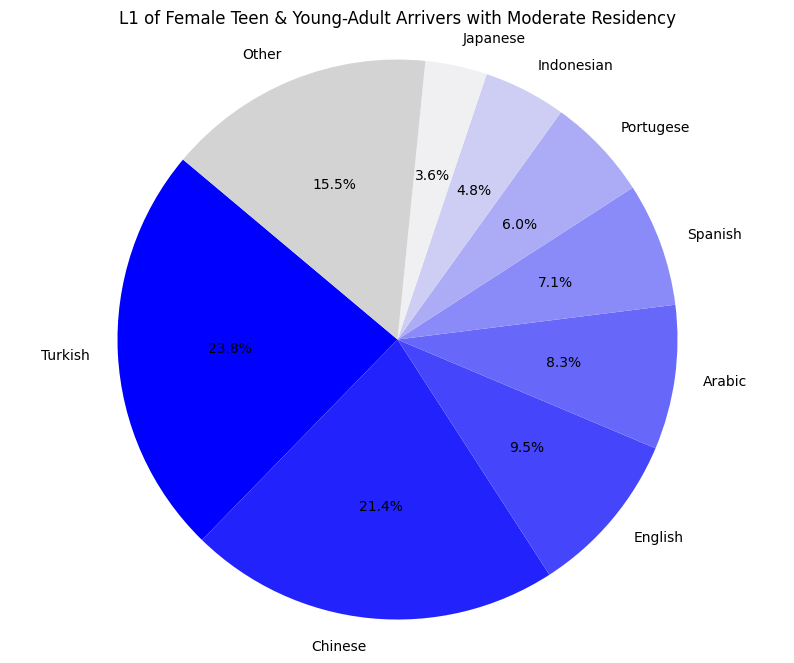

In [487]:
# Calculate the percentage of each L1
l1_counts_tamrf = filtered_teen_arrivers_mid_residency_female['L1'].value_counts()
l1_percentages_tamrf = l1_counts_tamrf / l1_counts_tamrf.sum() * 100

# Separate the languages that are represented by 3% or more
l1_labels_tamrf = l1_percentages_tamrf[l1_percentages_tamrf >= 3].index.tolist()

# Group the languages that are represented by less than 3% into "Other"
l1_percentages_tamrf['Other'] = l1_percentages_tamrf[l1_percentages_tamrf < 3].sum()
l1_percentages_tamrf = l1_percentages_tamrf[l1_percentages_tamrf >= 3]
l1_labels_tamrf.append('Other')

# Define a gradient color scheme with "Other" being light grey and each percentage progressively darker
colors = sns.light_palette("blue", n_colors=len(l1_labels_tamrf) - 1, reverse=True).as_hex()
colors.append("#D3D3D3")  # Light grey for "Other"

# Plot the pie chart
plt.figure(figsize=(10, 8))
plt.pie(l1_percentages_tamrf, labels=l1_labels_tamrf, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('L1 of Female Teen & Young-Adult Arrivers with Moderate Residency')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### As with males in a similar pocket of concern, Turkish is the most-spoken language among female teen and young-adult arrivers who have moderate residency (23.8%). They do not, however, represent such a large percentage of the learners. In contrast with the males, Chinese-speaking learners make up a large amount of the learners (21.4%). Interestingly, there are more "common" languages represented here and not as many that may be indicative of socio-political reasons for migrating to the Netherlands, such as asylum seeking. 

### *Female Adult Arrivers with Moderate Residency: AaA = 30-49, LoR = 10-19*

In [481]:
# Filter the dataset
filtered_mid_arrivers_mid_residency_female = data[(data['AaA'] >= 30) & (data['AaA'] <= 49) & (data['LoR'] >= 10) & (data['LoR'] <= 19) & (data['Sex'] == "Female") & (data['Speaking'] <= 510)]

# Display the filtered dataset
filtered_mid_arrivers_mid_residency_female.info()

<class 'pandas.core.frame.DataFrame'>
Index: 221 entries, 640 to 50193
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   L1               221 non-null    object 
 1   C                221 non-null    object 
 2   L1L2             221 non-null    object 
 3   L2               221 non-null    object 
 4   AaA              221 non-null    int64  
 5   LoR              221 non-null    int64  
 6   Edu.day          221 non-null    float64
 7   Sex              221 non-null    object 
 8   Family           221 non-null    object 
 9   ISO639.3         221 non-null    object 
 10  Enroll           221 non-null    int64  
 11  Speaking         221 non-null    int64  
 12  morph            218 non-null    float64
 13  lex              221 non-null    float64
 14  new_feat         203 non-null    float64
 15  new_sounds       203 non-null    float64
 16  AaA_zscore       221 non-null    float64
 17  Speaking_zscore  

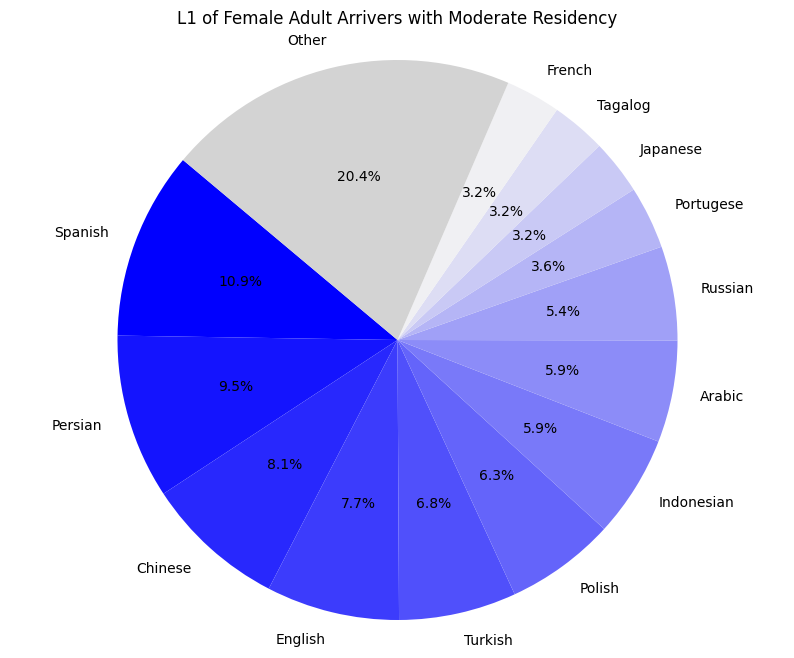

In [488]:
# Calculate the percentage of each L1
l1_counts_mamrf = filtered_mid_arrivers_mid_residency_female['L1'].value_counts()
l1_percentages_mamrf = l1_counts_mamrf / l1_counts_mamrf.sum() * 100

# Separate the languages that are represented by 3% or more
l1_labels_mamrf = l1_percentages_mamrf[l1_percentages_mamrf >= 3].index.tolist()

# Group the languages that are represented by less than 3% into "Other"
l1_percentages_mamrf['Other'] = l1_percentages_mamrf[l1_percentages_mamrf < 3].sum()
l1_percentages_mamrf = l1_percentages_mamrf[l1_percentages_mamrf >= 3]
l1_labels_mamrf.append('Other')

# Define a gradient color scheme with "Other" being light grey and each percentage progressively darker
colors = sns.light_palette("blue", n_colors=len(l1_labels_mamrf) - 1, reverse=True).as_hex()
colors.append("#D3D3D3")  # Light grey for "Other"

# Plot the pie chart
plt.figure(figsize=(10, 8))
plt.pie(l1_percentages_mamrf, labels=l1_labels_mamrf, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('L1 of Female Adult Arrivers with Moderate Residency')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### For female adult learners with moderate residency, it is very interesting to note that there is no clear outlier(s) for native languages, but rather several languages with moderate representation.

### *Female Mature Arrivers with Short Residency: AaA >= 50, LoR <= 9*

In [493]:
# Filter the dataset
filtered_late_arrivers_short_residency_female = data[(data['AaA'] >= 50) & (data['LoR'] <= 9) & (data['Sex'] == 'Female') & (data['Speaking'] <= 510)]

# Display the filtered dataset
filtered_late_arrivers_short_residency_female.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 101 to 49728
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   L1               60 non-null     object 
 1   C                60 non-null     object 
 2   L1L2             60 non-null     object 
 3   L2               60 non-null     object 
 4   AaA              60 non-null     int64  
 5   LoR              60 non-null     int64  
 6   Edu.day          60 non-null     float64
 7   Sex              60 non-null     object 
 8   Family           60 non-null     object 
 9   ISO639.3         60 non-null     object 
 10  Enroll           60 non-null     int64  
 11  Speaking         60 non-null     int64  
 12  morph            59 non-null     float64
 13  lex              60 non-null     float64
 14  new_feat         58 non-null     float64
 15  new_sounds       58 non-null     float64
 16  AaA_zscore       60 non-null     float64
 17  Speaking_zscore  6

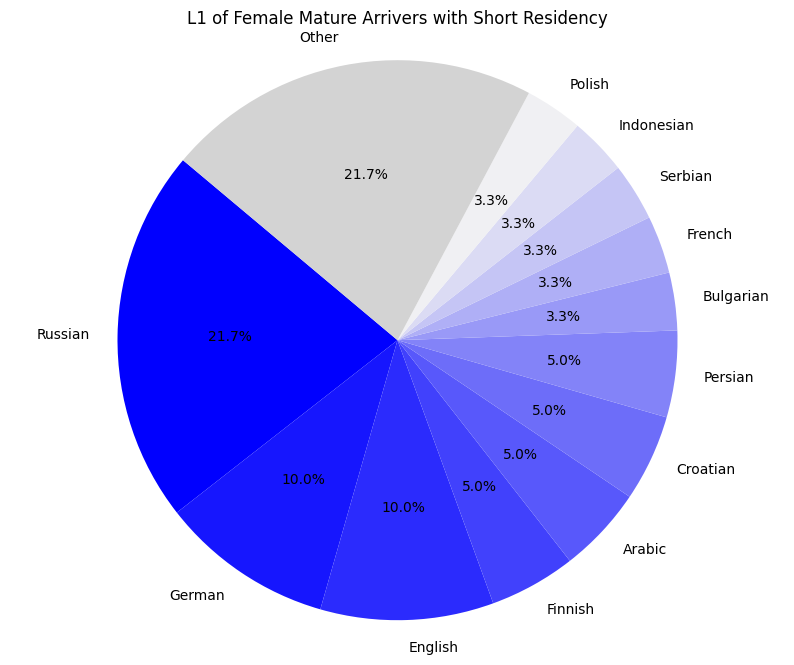

In [495]:
# Calculate the percentage of each L1
l1_counts_lasrf = filtered_late_arrivers_short_residency_female['L1'].value_counts()
l1_percentages_lasrf = l1_counts_lasrf / l1_counts_lasrf.sum() * 100

# Separate the languages that are represented by 3% or more
l1_labels_lasrf = l1_percentages_lasrf[l1_percentages_lasrf >= 3].index.tolist()

# Group the languages that are represented by less than 3% into "Other"
l1_percentages_lasrf['Other'] = l1_percentages_lasrf[l1_percentages_lasrf < 3].sum()
l1_percentages_lasrf = l1_percentages_lasrf[l1_percentages_lasrf >= 3]
l1_labels_lasrf.append('Other')

# Define a gradient color scheme with "Other" being light grey and each percentage progressively darker
colors = sns.light_palette("blue", n_colors=len(l1_labels_lasrf) - 1, reverse=True).as_hex()
colors.append("#D3D3D3")  # Light grey for "Other"

# Plot the pie chart
plt.figure(figsize=(10, 8))
plt.pie(l1_percentages_lasrf, labels=l1_labels_lasrf, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('L1 of Female Mature Arrivers with Short Residency')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

###  For female mature arrivers with short residency, a surprising appearance of Russian-speaking learners in this population may indicate socio-political factors at work (such as migration due to the Russian-Ukrainian war). 



## Female Poor Performers: Key Observations

### As with males, EU and NL policies pre-2021 may have negatively impacted female learners. In contrast to the males, however, we see this more among slightly younger females. 

### Much greater linguistic diversity amongst female adults with moderate residency suggests other influencing factors, such as access to childcare

### Recently-arrived Russian & northern-EU women with medium education levels, whatever their reasons for migrating, are underserved


## Conclusions

### By focusing on only low-performing learners who did not meet the cut score for the speaking test, we are able to more closely explore the characteristics of these learners and determine the factors that may have contributed to their low performance. Specifically, we have identified two distinct groups of lower performers amongst both males and females.  

## Summary of Key Observations:
### -*Turkish- and Arabic-speaking learners are underserved, especially among adult men and young adult women*

### -*Social and economic factors present significant barriers to language proficiency success, especially for adult and mature women*

### -*Education level, whether higher or lower, can present barriers to language proficiency success*


## Strategic Recommendations:
### -*Create more Turkish-to-Dutch language programs and Turkish-language promotional materials to distribute among Turkish cultural, religious, and social groups; similar for Arabic*

### -*Support female learners by providing transportation to and childcare during classes, or, in the case of asylum seekers, more on-site intervention in refugee centers*

### -*Appeal to older learners with lower education levels through content-based (rather than language-based) instruction and service learning*


## Future Data Analysis:
### -*Augment dataset with additional data points, such as socio-economic level or motivation for exam*

### -*Longitudinal study of impact of free transport and childcare on female proficiency and on-site instruction in refugee centers*

### -*Effects of EU & NL policy changes, both the 2021 EU law change reversing the illegality of requiring Turkish nationals to integrate, and 2025 NL law requiring all Turkish nationals who register for residency after 1 January 2025 to pass exams for integration.*







# References
#### “Immigration to the Netherlands”  https://www.government.nl/topics/immigration-to-the-netherlands

#### “State Exam NT2” https://www.staatsexamensnt2.nl/

#### Bechger, et al. (2009). “Standard Setting in Relation to the Common European Framework of Reference for Languages: The Case of the State Examination of Dutch as a Second Language” http://dx.doi.org/10.1080/15434300802457521

#### Capman (2022). “Impact of English Skills in the workplace” https://capman.es/blog/impact-english-skills-workplace

#### Dalderop, et al. (2023) “Integration policies” https://www.leslla.org/blog/2023/5/31/integration-policies

#### Davia, et al. (2022). “Language proficiency and immigrants’ employment outcomes in Spain” https://ojs.ual.es/ojs/index.php/RIEM/article/view/6322

#### Derwing, et al. (2012). “Language Skills and the Social Integration of Canada’s Adult Immigrants” https://irpp.org/research-studieslanguage-skills-and-the-social-integration-of-canadas-adult-immigrants/

#### Hammer (2017). “Sociocultural integration and second language proficiency following migration” https://www.degruyter.com/document/doi/10.1515/9783110477498-012/html?lang=en

#### Hartshorne, et al. (2019). “A critical period for second language acquisition: Evidence from 2/3 million English speakers” https://pmc.ncbi.nlm.nih.gov/articles/PMC6559801/

#### Kang, et al. (2021). “Language and nonlanguage factors in foreign language learning: evidence for the learning condition hypothesis” https://www.nature.com/articles/s41539-021-00104-9#citeas

#### Schepens, et al. (2019). “Big Data Suggests Strong Constraints of Linguistic Similarity on Adult Language Learning”.  https://www.sas.rochester.edu/cls/assets/pdf/schepens-van-hout-jaeger-2020-big-data-suggest-strong-constraints-of-linguistic-similarity-on-adult-language-learning.pdf

#### Wood, et al. (2024). “Does timing matter? Language course participation and language outcomes amongst new immigrants” https://www.nature.com/articles/s41599-024-03034-0
